In [1]:
import numpy as np
import csv
from scipy.signal import argrelextrema
from matplotlib import pyplot as plt

# Functions

The following functions complete all the data cleaning, analysis, and representation for matracies of z-value data from granular AFM images extracted from Gwyddion. 

The expected input is a raw data csv text file of n by n dimensions (square), contaiing values extracted from Gwyddion using the given PyGwy script.


In [2]:
def divide_chunks(data,n=512):
    temp = list()
    for i in range(0, len(data), n):
        temp.append(data[i:i + n])
    return temp


def get_diams(data):
    temp = list()
    for i in data:
        mins = argrelextrema(i, np.less)
        mins = mins[0]
        mins = mins*0.01171875
        temp.append(mins)
    return temp
    
    
def get_avg_and_std_diameter(data):
    temp = list()
    for i in data:
        diam = np.diff(i)
        temp.append(diam)
    temp = np.concatenate(temp).ravel()
    mean_diameter = np.mean(temp)
    std_diameter = np.std(temp)
    return mean_diameter,std_diameter



def get_heights(data):
    temp = list()
    for i in data:
        maxes = i[argrelextrema(i, np.greater)[0]]
        temp.append(maxes)
    return temp


    
def get_avg_and_std_height(data):
    temp = np.concatenate(data).ravel()
    mean_max = np.mean(temp)
    std_max = np.std(temp)
    return mean_max,std_max


def max_min_diams(data):
    maxes = list()
    mins = list()
    for i in data:
        diam = np.diff(i)
        maxes.append(max(diam))
        mins.append(min(diam))
    max_average = np.mean(maxes)
    max_std = np.std(maxes)
    min_average = np.mean(mins)
    min_std = np.std(mins)
    return max_average, max_std, min_average, min_std

def max_min_heights(data):
    maxes = list()
    mins = list()
    for i in data:
        maxes.append(max(i))
        mins.append(min(i))
    max_average = np.mean(maxes)
    max_std = np.std(maxes)
    min_average = np.mean(mins)
    min_std = np.std(mins)
    return max_average, max_std, min_average, min_std

# C3 Data Processing

### Opening all csv's

In [3]:
with open('gwy_data/c3_5_full.txt', newline='') as f:
    reader = csv.reader(f)
    c3_5_data = list(reader)
    c3_5_data = np.array(c3_5_data[0])
    c3_5_raw_data = c3_5_data.astype(float)
    
with open('gwy_data/c3_12_full.txt', newline='') as f:
    reader = csv.reader(f)
    c3_12_data = list(reader)
    c3_12_data = np.array(c3_12_data[0])
    c3_12_raw_data = c3_12_data.astype(float)

### Running raw data through functions

In [4]:
c3_5_divided = divide_chunks(c3_5_raw_data)
c3_12_divided = divide_chunks(c3_12_raw_data)

c3_5_diams = get_diams(c3_5_divided)
c3_12_diams = get_diams(c3_12_divided)

c3_0_mean_diameter = 0.000001
c3_5_mean_diameter, c3_5_std_diameter = get_avg_and_std_diameter(c3_5_diams)
c3_12_mean_diameter, c3_12_std_diameter = get_avg_and_std_diameter(c3_12_diams)

c3_5_height = get_heights(c3_5_divided)
c3_12_height = get_heights(c3_12_divided)

c3_0_mean_height = 0.000001
c3_5_mean_height, c3_5_std_height = get_avg_and_std_height(c3_5_height)
c3_12_mean_height, c3_12_std_height = get_avg_and_std_height(c3_12_height)

c3_0_max_average_diam, c3_0_min_average_diam = 0.000001, 0.000001
c3_5_max_average_diam, c3_5_max_std_diam, c3_5_min_average_diam, c3_5_min_std_diam = max_min_diams(c3_5_diams)
c3_12_max_average_diam, c3_12_max_std_diam, c3_12_min_average_diam, c3_12_min_std_diam = max_min_diams(c3_12_diams)

c3_0_max_average_height, c3_0_min_average_height = 0.000001, 0.000001
c3_5_max_average_height, c3_5_max_std_height, c3_5_min_average_height, c3_5_min_std_height = max_min_heights(c3_5_height)
c3_12_max_average_height, c3_12_max_std_height, c3_12_min_average_height, c3_12_min_std_height = max_min_heights(c3_12_height)

## C3 Average Diameter/Max Diam/Min Diam Graph

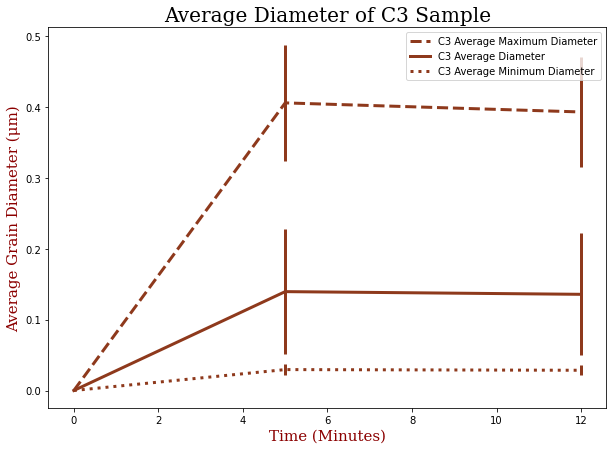

In [5]:
c3_times = np.array([0.000001, 5, 12])
c3_max_diams = [c3_0_max_average_diam,c3_5_max_average_diam,c3_12_max_average_diam]
c3_max_diams_std = [0,c3_5_max_std_diam,c3_12_max_std_diam]
c3_average_diams = [c3_0_mean_diameter,c3_5_mean_diameter,c3_12_mean_diameter]
c3_average_diams_std = [0,c3_5_std_diameter,c3_12_std_diameter]
c3_min_diams = [c3_0_min_average_diam,c3_5_min_average_diam,c3_12_min_average_diam]
c3_min_diams_std = [0,c3_5_min_std_diam,c3_12_min_std_diam]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c3_times, c3_max_diams, lw=3, ls='dashed', color=(0.555, 0.222, 0.111), label='C3 Average Maximum Diameter')
plt.errorbar(c3_times, c3_max_diams, c3_max_diams_std, lw=3, ls='', color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_average_diams, lw=3, color=(0.555, 0.222, 0.111), linestyle='-', label='C3 Average Diameter')
plt.errorbar(c3_times, c3_average_diams, c3_average_diams_std, ls='',lw=3, color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_min_diams, lw=3, color=(0.555, 0.222, 0.111), linestyle=':', label='C3 Average Minimum Diameter')
plt.errorbar(c3_times, c3_min_diams, c3_min_diams_std, ls='', lw=3, color=(0.555, 0.222, 0.111))

plt.title('Average Diameter of C3 Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontdict = font2)
plt.legend()
plt.show()

## C3 Average Height Graph

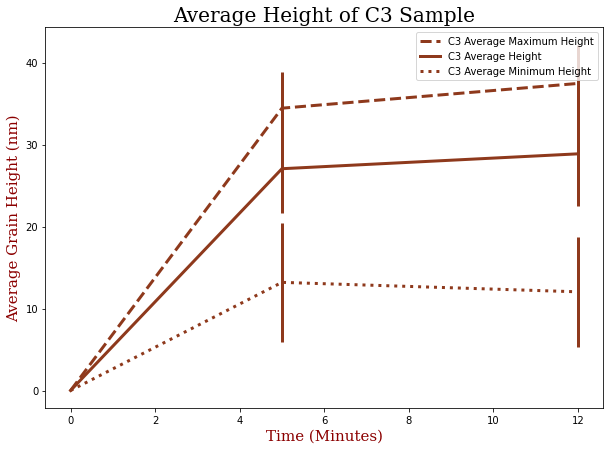

In [6]:
c3_times = np.array([0.000001, 5, 12])
c3_max_height = [c3_0_max_average_height,c3_5_max_average_height,c3_12_max_average_height]
c3_max_height_std = [0,c3_5_max_std_height,c3_12_max_std_height]
c3_average_height = [c3_0_mean_height,c3_5_mean_height,c3_12_mean_height]
c3_average_height_std = [0,c3_5_std_height,c3_12_std_height]
c3_min_height = [c3_0_min_average_height,c3_5_min_average_height,c3_12_min_average_height]
c3_min_height_std = [0,c3_5_min_std_height,c3_12_min_std_height]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c3_times, c3_max_height, lw=3, ls='dashed', color=(0.555, 0.222, 0.111), label='C3 Average Maximum Height')
plt.errorbar(c3_times, c3_max_height, c3_max_height_std, lw=3, ls='', color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_average_height, lw=3, color=(0.555, 0.222, 0.111), linestyle='-', label='C3 Average Height')
plt.errorbar(c3_times, c3_average_height, c3_average_height_std, ls='',lw=3, color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_min_height, lw=3, color=(0.555, 0.222, 0.111), linestyle=':', label='C3 Average Minimum Height')
plt.errorbar(c3_times, c3_min_height, c3_min_height_std, ls='', lw=3, color=(0.555, 0.222, 0.111))

plt.title('Average Height of C3 Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontdict = font2)
plt.legend()
plt.show()

# C7 Data Processing

### Opening all csv's

In [7]:
with open('gwy_data/c7_13_full.txt', newline='') as f:
    reader = csv.reader(f)
    c7_13_data = list(reader)
    c7_13_data = np.array(c7_13_data[0])
    c7_13_raw_data = c7_13_data.astype(float)
    
with open('gwy_data/c7_23_full.txt', newline='') as f:
    reader = csv.reader(f)
    c7_23_data = list(reader)
    c7_23_data = np.array(c7_23_data[0])
    c7_23_raw_data = c7_23_data.astype(float)
    
with open('gwy_data/c7_40_full.txt', newline='') as f:
    reader = csv.reader(f)
    c7_40_data = list(reader)
    c7_40_data = np.array(c7_40_data[0])
    c7_40_raw_data = c7_40_data.astype(float)

### Running raw data through functions

In [8]:
c7_13_divided = divide_chunks(c7_13_raw_data)
c7_23_divided = divide_chunks(c7_23_raw_data)
c7_40_divided = divide_chunks(c7_40_raw_data)

c7_13_diams = get_diams(c7_13_divided)
c7_23_diams = get_diams(c7_23_divided)
c7_40_diams = get_diams(c7_40_divided)

c7_0_mean_diameter = 0.000001
c7_13_mean_diameter, c7_13_std_diameter = get_avg_and_std_diameter(c7_13_diams)
c7_23_mean_diameter, c7_23_std_diameter = get_avg_and_std_diameter(c7_23_diams)
c7_40_mean_diameter, c7_40_std_diameter = get_avg_and_std_diameter(c7_40_diams)

c7_13_height = get_heights(c7_13_divided)
c7_23_height = get_heights(c7_23_divided)
c7_40_height = get_heights(c7_40_divided)

c7_0_mean_height = 0.000001
c7_13_mean_height, c7_13_std_height = get_avg_and_std_height(c7_13_height)
c7_23_mean_height, c7_23_std_height = get_avg_and_std_height(c7_23_height)
c7_40_mean_height, c7_40_std_height = get_avg_and_std_height(c7_40_height)

c7_0_max_average_diam, c7_0_min_average_diam = 0.000001, 0.000001
c7_13_max_average_diam, c7_13_max_std_diam, c7_13_min_average_diam, c7_13_min_std_diam = max_min_diams(c7_13_diams)
c7_23_max_average_diam, c7_23_max_std_diam, c7_23_min_average_diam, c7_23_min_std_diam = max_min_diams(c7_23_diams)
c7_40_max_average_diam, c7_40_max_std_diam, c7_40_min_average_diam, c7_40_min_std_diam = max_min_diams(c7_40_diams)

c7_0_max_average_height, c7_0_min_average_height = 0.000001, 0.000001
c7_13_max_average_height, c7_13_max_std_height, c7_13_min_average_height, c7_13_min_std_height = max_min_heights(c7_13_height)
c7_23_max_average_height, c7_23_max_std_height, c7_23_min_average_height, c7_23_min_std_height = max_min_heights(c7_23_height)
c7_40_max_average_height, c7_40_max_std_height, c7_40_min_average_height, c7_40_min_std_height = max_min_heights(c7_40_height)                                                                                                                 

## C7 Average Diameter/Max Diam/Min Diam Graph

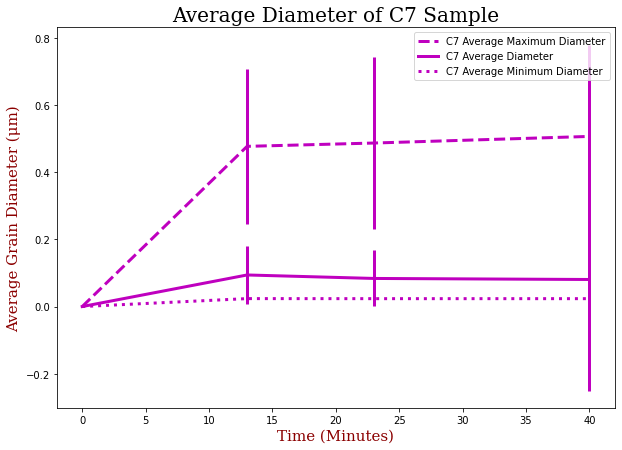

In [9]:
c7_times = np.array([0.000001, 13, 23, 40])
c7_max_diams = [c7_0_max_average_diam,c7_13_max_average_diam,c7_23_max_average_diam,c7_40_max_average_diam]
c7_max_diams_std = [0,c7_13_max_std_diam,c7_23_max_std_diam,c7_40_max_std_diam]
c7_average_diams = [c7_0_mean_diameter,c7_13_mean_diameter,c7_23_mean_diameter,c7_40_mean_diameter]
c7_average_diams_std = [0,c7_13_std_diameter,c7_23_std_diameter,c7_40_std_diameter]
c7_min_diams = [c7_0_min_average_diam,c7_13_min_average_diam,c7_23_min_average_diam,c7_40_min_average_diam]
c7_min_diams_std = [0,c7_13_min_std_diam,c7_23_min_std_diam,c7_40_max_std_diam]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c7_times, c7_max_diams, lw=3, ls='dashed', color=(0.75, 0.0, 0.75), label='C7 Average Maximum Diameter')
plt.errorbar(c7_times, c7_max_diams, c7_max_diams_std, lw=3, ls='', color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_average_diams, lw=3, color=(0.75, 0.0, 0.75), linestyle='-', label='C7 Average Diameter')
plt.errorbar(c7_times, c7_average_diams, c7_average_diams_std, ls='',lw=3, color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_min_diams, lw=3, color=(0.75, 0.0, 0.75), linestyle=':', label='C7 Average Minimum Diameter')
plt.errorbar(c7_times, c7_min_diams, c7_min_diams_std, ls='', lw=3, color=(0.75, 0.0, 0.75))

plt.title('Average Diameter of C7 Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontdict = font2)
plt.legend()
plt.show()

## C7 Average Height Graph

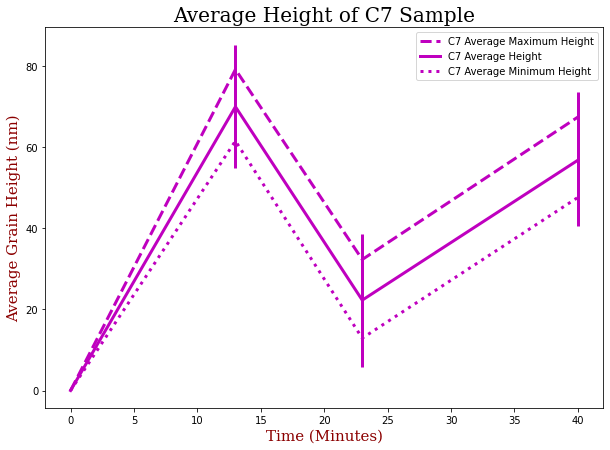

In [10]:
c7_times = np.array([0.000001, 13, 23, 40])
c7_max_height = [c7_0_max_average_height,c7_13_max_average_height,c7_23_max_average_height,c7_40_max_average_height]
c7_max_height_std = [0,c7_13_max_std_height,c7_23_max_std_height,c7_40_max_std_height]
c7_average_height = [c7_0_mean_height,c7_13_mean_height,c7_23_mean_height,c7_40_mean_height]
c7_average_height_std = [0,c7_13_std_height,c7_23_std_height,c7_40_std_height]
c7_min_height = [c7_0_min_average_height,c7_13_min_average_height,c7_23_min_average_height,c7_40_min_average_height]
c7_min_height_std = [0,c7_13_min_std_height,c7_23_min_std_height,c7_40_min_std_height]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c7_times, c7_max_height, lw=3, ls='dashed', color=(0.75, 0.0, 0.75), label='C7 Average Maximum Height')
plt.errorbar(c7_times, c7_max_height, c7_max_height_std, lw=3, ls='', color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_average_height, lw=3, color=(0.75, 0.0, 0.75), linestyle='-', label='C7 Average Height')
plt.errorbar(c7_times, c7_average_height, c7_average_height_std, ls='',lw=3, color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_min_height, lw=3, color=(0.75, 0.0, 0.75), linestyle=':', label='C7 Average Minimum Height')
plt.errorbar(c7_times, c7_min_height, c7_min_height_std, ls='', lw=3, color=(0.75, 0.0, 0.75))

plt.title('Average Height of C7 Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontdict = font2)
plt.legend()
plt.show()

# C7OH Data Processing

### Opening all csv's

In [11]:
with open('gwy_data/c7OH_13_full.txt', newline='') as f:
    reader = csv.reader(f)
    c7OH_13_data = list(reader)
    c7OH_13_data = np.array(c7OH_13_data[0])
    c7OH_13_raw_data = c7OH_13_data.astype(float)
    
with open('gwy_data/c7OH_20_full.txt', newline='') as f:
    reader = csv.reader(f)
    c7OH_20_data = list(reader)
    c7OH_20_data = np.array(c7OH_20_data[0])
    c7OH_20_raw_data = c7OH_20_data.astype(float)
    
with open('gwy_data/c7OH_26_full.txt', newline='') as f:
    reader = csv.reader(f)
    c7OH_26_data = list(reader)
    c7OH_26_data = np.array(c7OH_26_data[0])
    c7OH_26_raw_data = c7OH_26_data.astype(float)

### Running raw data through functions

In [12]:
c7OH_13_divided = divide_chunks(c7OH_13_raw_data)
c7OH_20_divided = divide_chunks(c7OH_20_raw_data)
c7OH_26_divided = divide_chunks(c7OH_26_raw_data)

c7OH_13_diams = get_diams(c7OH_13_divided)
c7OH_20_diams = get_diams(c7OH_20_divided)
c7OH_26_diams = get_diams(c7OH_26_divided)

c7OH_0_mean_diameter = 0.000001
c7OH_13_mean_diameter, c7OH_13_std_diameter = get_avg_and_std_diameter(c7OH_13_diams)
c7OH_20_mean_diameter, c7OH_20_std_diameter = get_avg_and_std_diameter(c7OH_20_diams)
c7OH_26_mean_diameter, c7OH_26_std_diameter = get_avg_and_std_diameter(c7OH_26_diams)

c7OH_13_height = get_heights(c7OH_13_divided)
c7OH_20_height = get_heights(c7OH_20_divided)
c7OH_26_height = get_heights(c7OH_26_divided)

c7OH_0_mean_height = 0.000001
c7OH_13_mean_height, c7OH_13_std_height = get_avg_and_std_height(c7OH_13_height)
c7OH_20_mean_height, c7OH_20_std_height = get_avg_and_std_height(c7OH_20_height)
c7OH_26_mean_height, c7OH_26_std_height = get_avg_and_std_height(c7OH_26_height)

c7OH_0_max_average_diam, c7OH_0_min_average_diam = 0.000001, 0.000001
c7OH_13_max_average_diam, c7OH_13_max_std_diam, c7OH_13_min_average_diam, c7OH_13_min_std_diam = max_min_diams(c7OH_13_diams)
c7OH_20_max_average_diam, c7OH_20_max_std_diam, c7OH_20_min_average_diam, c7OH_20_min_std_diam = max_min_diams(c7OH_20_diams)
c7OH_26_max_average_diam, c7OH_26_max_std_diam, c7OH_26_min_average_diam, c7OH_26_min_std_diam = max_min_diams(c7OH_26_diams)

c7OH_0_max_average_height, c7OH_0_min_average_height = 0.000001, 0.000001
c7OH_13_max_average_height, c7OH_13_max_std_height, c7OH_13_min_average_height, c7OH_13_min_std_height = max_min_heights(c7OH_13_height)
c7OH_20_max_average_height, c7OH_20_max_std_height, c7OH_20_min_average_height, c7OH_20_min_std_height = max_min_heights(c7OH_20_height)
c7OH_26_max_average_height, c7OH_26_max_std_height, c7OH_26_min_average_height, c7OH_26_min_std_height = max_min_heights(c7OH_26_height) 

## C7OH Average Diameter/Max Diam/Min Diam Graph

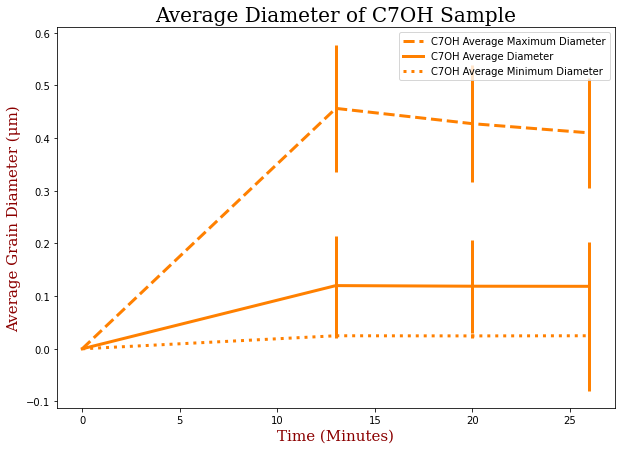

In [13]:
c7OH_times = np.array([0.000001, 13, 20, 26])
c7OH_max_diams = [c7OH_0_max_average_diam,c7OH_13_max_average_diam,c7OH_20_max_average_diam,c7OH_26_max_average_diam]
c7OH_max_diams_std = [0,c7OH_13_max_std_diam,c7OH_20_max_std_diam,c7OH_26_max_std_diam]
c7OH_average_diams = [c7OH_0_mean_diameter,c7OH_13_mean_diameter,c7OH_20_mean_diameter,c7OH_26_mean_diameter]
c7OH_average_diams_std = [0,c7OH_13_std_diameter,c7OH_20_std_diameter,c7OH_26_std_diameter]
c7OH_min_diams = [c7OH_0_min_average_diam,c7OH_13_min_average_diam,c7OH_20_min_average_diam,c7OH_26_min_average_diam]
c7OH_min_diams_std = [0,c7OH_13_min_std_diam,c7OH_20_min_std_diam,c7OH_26_max_std_diam]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c7OH_times, c7OH_max_diams, lw=3, ls='dashed', color=(1.0, 0.5, 0.0), label='C7OH Average Maximum Diameter')
plt.errorbar(c7OH_times, c7OH_max_diams, c7OH_max_diams_std, lw=3, ls='', color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_average_diams, lw=3, color=(1.0, 0.5, 0.0), linestyle='-', label='C7OH Average Diameter')
plt.errorbar(c7OH_times, c7OH_average_diams, c7OH_average_diams_std, ls='',lw=3, color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_min_diams, lw=3, color=(1.0, 0.5, 0.0), linestyle=':', label='C7OH Average Minimum Diameter')
plt.errorbar(c7OH_times, c7OH_min_diams, c7OH_min_diams_std, ls='', lw=3, color=(1.0, 0.5, 0.0))

plt.title('Average Diameter of C7OH Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontdict = font2)
plt.legend()
plt.show()

## C7OH Average Height Graph

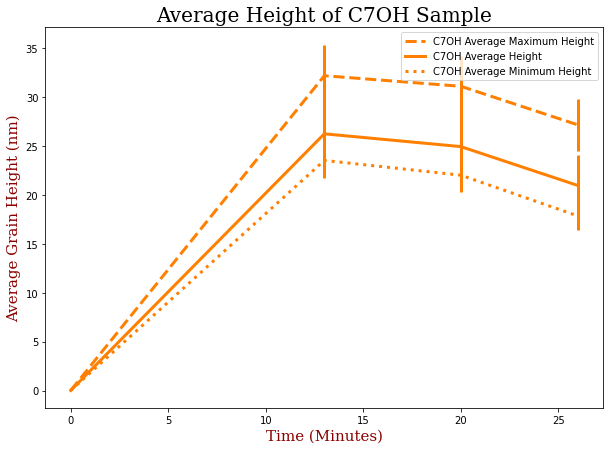

In [14]:
c7OH_times = np.array([0.000001, 13, 20, 26])
c7OH_max_height = [c7OH_0_max_average_height,c7OH_13_max_average_height,c7OH_20_max_average_height,c7OH_26_max_average_height]
c7OH_max_height_std = [0,c7OH_13_max_std_height,c7OH_20_max_std_height,c7OH_26_max_std_height]
c7OH_average_height = [c7OH_0_mean_height,c7OH_13_mean_height,c7OH_20_mean_height,c7OH_26_mean_height]
c7OH_average_height_std = [0,c7OH_13_std_height,c7OH_20_std_height,c7OH_26_std_height]
c7OH_min_height = [c7OH_0_min_average_height,c7OH_13_min_average_height,c7OH_20_min_average_height,c7OH_26_min_average_height]
c7OH_min_height_std = [0,c7OH_13_min_std_height,c7OH_20_min_std_height,c7OH_26_min_std_height]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c7OH_times, c7OH_max_height, lw=3, ls='dashed', color=(1.0, 0.5, 0.0), label='C7OH Average Maximum Height')
plt.errorbar(c7OH_times, c7OH_max_height, c7OH_max_height_std, lw=3, ls='', color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_average_height, lw=3, color=(1.0, 0.5, 0.0), linestyle='-', label='C7OH Average Height')
plt.errorbar(c7OH_times, c7OH_average_height, c7OH_average_height_std, ls='',lw=3, color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_min_height, lw=3, color=(1.0, 0.5, 0.0), linestyle=':', label='C7OH Average Minimum Height')
plt.errorbar(c7OH_times, c7OH_min_height, c7OH_min_height_std, ls='', lw=3, color=(1.0, 0.5, 0.0))

plt.title('Average Height of C7OH Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontdict = font2)
plt.legend()
plt.show()

# C11 Data Processing

### Opening all csv's

In [15]:
with open('gwy_data/c11_5_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11_5_data = list(reader)
    c11_5_data = np.array(c11_5_data[0])
    c11_5_raw_data = c11_5_data.astype(float)
    
with open('gwy_data/c11_14_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11_14_data = list(reader)
    c11_14_data = np.array(c11_14_data[0])
    c11_14_raw_data = c11_14_data.astype(float)
    
with open('gwy_data/c11_31_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11_31_data = list(reader)
    c11_31_data = np.array(c11_31_data[0])
    c11_31_raw_data = c11_31_data.astype(float)

with open('gwy_data/c11_77_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11_77_data = list(reader)
    c11_77_data = np.array(c11_77_data[0])
    c11_77_raw_data = c11_77_data.astype(float)

with open('gwy_data/c11_130_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11_130_data = list(reader)
    c11_130_data = np.array(c11_130_data[0])
    c11_130_raw_data = c11_130_data.astype(float)

### Running raw data through functions

In [16]:
c11_5_divided = divide_chunks(c11_5_raw_data)
c11_14_divided = divide_chunks(c11_14_raw_data)
c11_31_divided = divide_chunks(c11_31_raw_data)
c11_77_divided = divide_chunks(c11_77_raw_data)
c11_130_divided = divide_chunks(c11_130_raw_data)

c11_5_diams = get_diams(c11_5_divided)
c11_14_diams = get_diams(c11_14_divided)
c11_31_diams = get_diams(c11_31_divided)
c11_77_diams = get_diams(c11_77_divided)
c11_130_diams = get_diams(c11_130_divided)

c11_0_mean_diameter = 0.000001
c11_5_mean_diameter, c11_5_std_diameter = get_avg_and_std_diameter(c11_5_diams)
c11_14_mean_diameter, c11_14_std_diameter = get_avg_and_std_diameter(c11_14_diams)
c11_31_mean_diameter, c11_31_std_diameter = get_avg_and_std_diameter(c11_31_diams)
c11_77_mean_diameter, c11_77_std_diameter = get_avg_and_std_diameter(c11_77_diams)
c11_130_mean_diameter, c11_130_std_diameter = get_avg_and_std_diameter(c11_130_diams)

c11_5_height = get_heights(c11_5_divided)
c11_14_height = get_heights(c11_14_divided)
c11_31_height = get_heights(c11_31_divided)
c11_77_height = get_heights(c11_77_divided)
c11_130_height = get_heights(c11_130_divided)

c11_0_mean_height = 0.000001
c11_5_mean_height, c11_5_std_height = get_avg_and_std_height(c11_5_height)
c11_14_mean_height, c11_14_std_height = get_avg_and_std_height(c11_14_height)
c11_31_mean_height, c11_31_std_height = get_avg_and_std_height(c11_31_height)
c11_77_mean_height, c11_77_std_height = get_avg_and_std_height(c11_77_height)
c11_130_mean_height, c11_130_std_height = get_avg_and_std_height(c11_130_height)

c11_0_max_average_diam, c11_0_min_average_diam = 0.000001, 0.000001
c11_5_max_average_diam, c11_5_max_std_diam, c11_5_min_average_diam, c11_5_min_std_diam = max_min_diams(c11_5_diams)
c11_14_max_average_diam, c11_14_max_std_diam, c11_14_min_average_diam, c11_14_min_std_diam = max_min_diams(c11_14_diams)
c11_31_max_average_diam, c11_31_max_std_diam, c11_31_min_average_diam, c11_31_min_std_diam = max_min_diams(c11_31_diams)
c11_77_max_average_diam, c11_77_max_std_diam, c11_77_min_average_diam, c11_77_min_std_diam = max_min_diams(c11_77_diams)
c11_130_max_average_diam, c11_130_max_std_diam, c11_130_min_average_diam, c11_130_min_std_diam = max_min_diams(c11_130_diams)

c11_0_max_average_height, c11_0_min_average_height = 0.000001, 0.000001
c11_5_max_average_height, c11_5_max_std_height, c11_5_min_average_height, c11_5_min_std_height = max_min_heights(c11_5_height)
c11_14_max_average_height, c11_14_max_std_height, c11_14_min_average_height, c11_14_min_std_height = max_min_heights(c11_14_height)
c11_31_max_average_height, c11_31_max_std_height, c11_31_min_average_height, c11_31_min_std_height = max_min_heights(c11_31_height)
c11_77_max_average_height, c11_77_max_std_height, c11_77_min_average_height, c11_77_min_std_height = max_min_heights(c11_77_height)
c11_130_max_average_height, c11_130_max_std_height, c11_130_min_average_height, c11_130_min_std_height = max_min_heights(c11_130_height) 

## C11 Average Diameter/Max Diam/Min Diam Graph

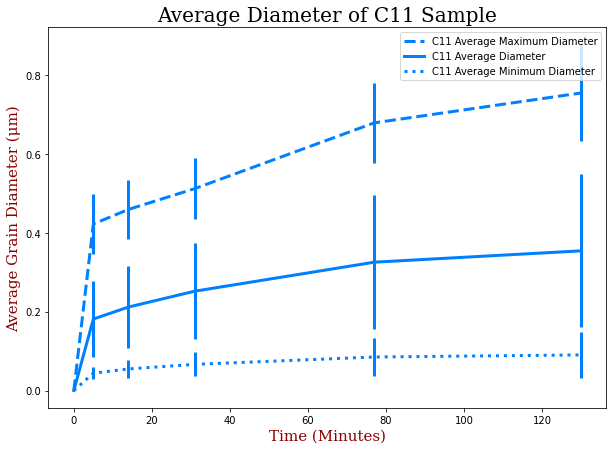

In [17]:
c11_times = np.array([0.000001, 5, 14,31, 77, 130])
c11_max_diams = [c11_0_max_average_diam,c11_5_max_average_diam,c11_14_max_average_diam,c11_31_max_average_diam,c11_77_max_average_diam,c11_130_max_average_diam]
c11_max_diams_std = [0,c11_5_max_std_diam,c11_14_max_std_diam,c11_31_max_std_diam,c11_77_max_std_diam,c11_130_max_std_diam]
c11_average_diams = [c11_0_mean_diameter,c11_5_mean_diameter,c11_14_mean_diameter,c11_31_mean_diameter,c11_77_mean_diameter,c11_130_mean_diameter]
c11_average_diams_std = [0,c11_5_std_diameter,c11_14_std_diameter,c11_31_std_diameter,c11_77_std_diameter,c11_130_std_diameter]
c11_min_diams = [c11_0_min_average_diam,c11_5_min_average_diam,c11_14_min_average_diam,c11_31_min_average_diam,c11_77_min_average_diam,c11_130_min_average_diam]
c11_min_diams_std = [0,c11_5_min_std_diam,c11_14_min_std_diam,c11_31_min_std_diam,c11_77_min_std_diam,c11_130_min_std_diam]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c11_times, c11_max_diams, lw=3, ls='dashed', color=(0.0, 0.5, 1.0), label='C11 Average Maximum Diameter')
plt.errorbar(c11_times, c11_max_diams, c11_max_diams_std, lw=3, ls='', color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_average_diams, lw=3, color=(0.0, 0.5, 1.0), linestyle='-', label='C11 Average Diameter')
plt.errorbar(c11_times, c11_average_diams, c11_average_diams_std, ls='',lw=3, color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_min_diams, lw=3, color=(0.0, 0.5, 1.0), linestyle=':', label='C11 Average Minimum Diameter')
plt.errorbar(c11_times, c11_min_diams, c11_min_diams_std, ls='', lw=3, color=(0.0, 0.5, 1.0))

plt.title('Average Diameter of C11 Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontdict = font2)
plt.legend()
plt.show()

## C11 Average Height Graph

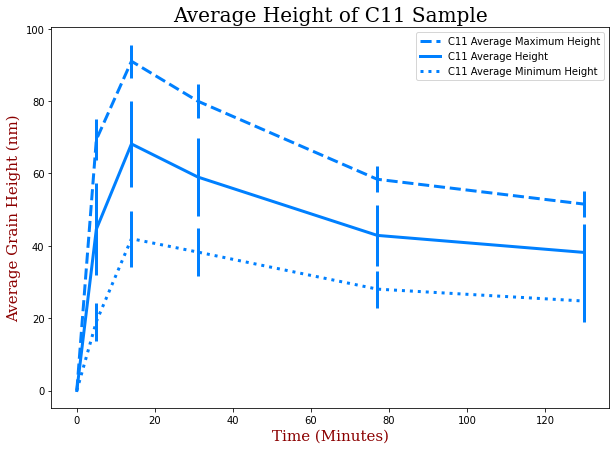

In [18]:
c11_times = np.array([0.000001, 5, 14,31, 77, 130])
c11_max_height = [c11_0_max_average_height,c11_5_max_average_height,c11_14_max_average_height,c11_31_max_average_height,c11_77_max_average_height,c11_130_max_average_height]
c11_max_height_std = [0,c11_5_max_std_height,c11_14_max_std_height,c11_31_max_std_height,c11_77_max_std_height,c11_130_max_std_height]
c11_average_height = [c11_0_mean_height,c11_5_mean_height,c11_14_mean_height,c11_31_mean_height,c11_77_mean_height,c11_130_mean_height]
c11_average_height_std = [0,c11_5_std_height,c11_14_std_height,c11_31_std_height,c11_77_std_height,c11_130_std_height]
c11_min_height = [c11_0_min_average_height,c11_5_min_average_height,c11_14_min_average_height,c11_31_min_average_height,c11_77_min_average_height,c11_130_min_average_height]
c11_min_height_std = [0,c11_5_min_std_height,c11_14_min_std_height,c11_31_min_std_height,c11_77_min_std_height,c11_130_min_std_height]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c11_times, c11_max_height, lw=3, ls='dashed', color=(0.0, 0.5, 1.0), label='C11 Average Maximum Height')
plt.errorbar(c11_times, c11_max_height, c11_max_height_std, lw=3, ls='', color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_average_height, lw=3, color=(0.0, 0.5, 1.0), linestyle='-', label='C11 Average Height')
plt.errorbar(c11_times, c11_average_height, c11_average_height_std, ls='',lw=3, color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_min_height, lw=3, color=(0.0, 0.5, 1.0), linestyle=':', label='C11 Average Minimum Height')
plt.errorbar(c11_times, c11_min_height, c11_min_height_std, ls='', lw=3, color=(0.0, 0.5, 1.0))

plt.title('Average Height of C11 Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontdict = font2)
plt.legend()
plt.show()

# C11OH Data Processing

### Opening all csv's

In [19]:
with open('gwy_data/c11OH_4_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11OH_4_data = list(reader)
    c11OH_4_data = np.array(c11OH_4_data[0])
    c11OH_4_raw_data = c11OH_4_data.astype(float)
    
with open('gwy_data/c11OH_18_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11OH_18_data = list(reader)
    c11OH_18_data = np.array(c11OH_18_data[0])
    c11OH_18_raw_data = c11OH_18_data.astype(float)

with open('gwy_data/c11OH_66_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11OH_66_data = list(reader)
    c11OH_66_data = np.array(c11OH_66_data[0])
    c11OH_66_raw_data = c11OH_66_data.astype(float)

with open('gwy_data/c11OH_100_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11OH_100_data = list(reader)
    c11OH_100_data = np.array(c11OH_100_data[0])
    c11OH_100_raw_data = c11OH_100_data.astype(float)

### Running raw data through functions

In [20]:
c11OH_4_divided = divide_chunks(c11OH_4_raw_data)
c11OH_18_divided = divide_chunks(c11OH_18_raw_data)
c11OH_66_divided = divide_chunks(c11OH_66_raw_data)
c11OH_100_divided = divide_chunks(c11OH_100_raw_data)

c11OH_4_diams = get_diams(c11OH_4_divided)
c11OH_18_diams = get_diams(c11OH_18_divided)
c11OH_66_diams = get_diams(c11OH_66_divided)
c11OH_100_diams = get_diams(c11OH_100_divided)

c11OH_0_mean_diameter = 0.000001
c11OH_4_mean_diameter, c11OH_4_std_diameter = get_avg_and_std_diameter(c11OH_4_diams)
c11OH_18_mean_diameter, c11OH_18_std_diameter = get_avg_and_std_diameter(c11OH_18_diams)
c11OH_66_mean_diameter, c11OH_66_std_diameter = get_avg_and_std_diameter(c11OH_66_diams)
c11OH_100_mean_diameter, c11OH_100_std_diameter = get_avg_and_std_diameter(c11OH_100_diams)

c11OH_4_height = get_heights(c11OH_4_divided)
c11OH_18_height = get_heights(c11OH_18_divided)
c11OH_66_height = get_heights(c11OH_66_divided)
c11OH_100_height = get_heights(c11OH_100_divided)

c11OH_0_mean_height = 0.000001
c11OH_4_mean_height, c11OH_4_std_height = get_avg_and_std_height(c11OH_4_height)
c11OH_18_mean_height, c11OH_18_std_height = get_avg_and_std_height(c11OH_18_height)
c11OH_66_mean_height, c11OH_66_std_height = get_avg_and_std_height(c11OH_66_height)
c11OH_100_mean_height, c11OH_100_std_height = get_avg_and_std_height(c11OH_100_height)

c11OH_0_max_average_diam, c11OH_0_min_average_diam = 0.000001, 0.000001
c11OH_4_max_average_diam, c11OH_4_max_std_diam, c11OH_4_min_average_diam, c11OH_4_min_std_diam = max_min_diams(c11OH_4_diams)
c11OH_18_max_average_diam, c11OH_18_max_std_diam, c11OH_18_min_average_diam, c11OH_18_min_std_diam = max_min_diams(c11OH_18_diams)
c11OH_66_max_average_diam, c11OH_66_max_std_diam, c11OH_66_min_average_diam, c11OH_66_min_std_diam = max_min_diams(c11OH_66_diams)
c11OH_100_max_average_diam, c11OH_100_max_std_diam, c11OH_100_min_average_diam, c11OH_100_min_std_diam = max_min_diams(c11OH_100_diams)

c11OH_0_max_average_height, c11OH_0_min_average_height = 0.000001, 0.000001
c11OH_4_max_average_height, c11OH_4_max_std_height, c11OH_4_min_average_height, c11OH_4_min_std_height = max_min_heights(c11OH_4_height)
c11OH_18_max_average_height, c11OH_18_max_std_height, c11OH_18_min_average_height, c11OH_18_min_std_height = max_min_heights(c11OH_18_height)
c11OH_66_max_average_height, c11OH_66_max_std_height, c11OH_66_min_average_height, c11OH_66_min_std_height = max_min_heights(c11OH_66_height)
c11OH_100_max_average_height, c11OH_100_max_std_height, c11OH_100_min_average_height, c11OH_100_min_std_height = max_min_heights(c11OH_100_height)

## C11OH Average Diameter/Max Diam/Min Diam Graph

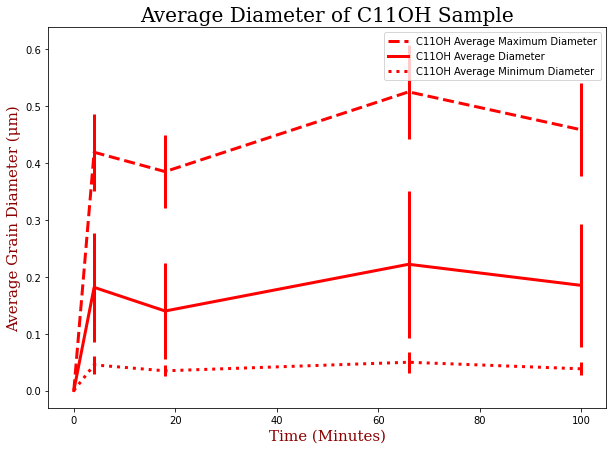

In [21]:
c11OH_times = np.array([0.000001, 4, 18, 66, 100])
c11OH_max_diams = [c11OH_0_max_average_diam,c11OH_4_max_average_diam,c11OH_18_max_average_diam,c11OH_66_max_average_diam,c11OH_100_max_average_diam]
c11OH_max_diams_std = [0,c11OH_4_max_std_diam,c11OH_18_max_std_diam,c11OH_66_max_std_diam,c11OH_100_max_std_diam]
c11OH_average_diams = [c11OH_0_mean_diameter,c11OH_4_mean_diameter,c11OH_18_mean_diameter,c11OH_66_mean_diameter,c11OH_100_mean_diameter]
c11OH_average_diams_std = [0,c11OH_4_std_diameter,c11OH_18_std_diameter,c11OH_66_std_diameter,c11OH_100_std_diameter]
c11OH_min_diams = [c11OH_0_min_average_diam,c11OH_4_min_average_diam,c11OH_18_min_average_diam,c11OH_66_min_average_diam,c11OH_100_min_average_diam]
c11OH_min_diams_std = [0,c11OH_4_min_std_diam,c11OH_18_min_std_diam,c11OH_66_min_std_diam,c11OH_100_min_std_diam] 

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c11OH_times, c11OH_max_diams, lw=3, ls='dashed', color=(1.0, 0.0, 0.0), label='C11OH Average Maximum Diameter')
plt.errorbar(c11OH_times, c11OH_max_diams, c11OH_max_diams_std, lw=3, ls='', color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_average_diams, lw=3, color=(1.0, 0.0, 0.0), linestyle='-', label='C11OH Average Diameter')
plt.errorbar(c11OH_times, c11OH_average_diams, c11OH_average_diams_std, ls='',lw=3, color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_min_diams, lw=3, color=(1.0, 0.0, 0.0), linestyle=':', label='C11OH Average Minimum Diameter')
plt.errorbar(c11OH_times, c11OH_min_diams, c11OH_min_diams_std, lw=3, ls='', color=(1.0, 0.0, 0.0))

plt.title('Average Diameter of C11OH Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontdict = font2)
plt.legend()
plt.show()

## C11OH Average Height Graph

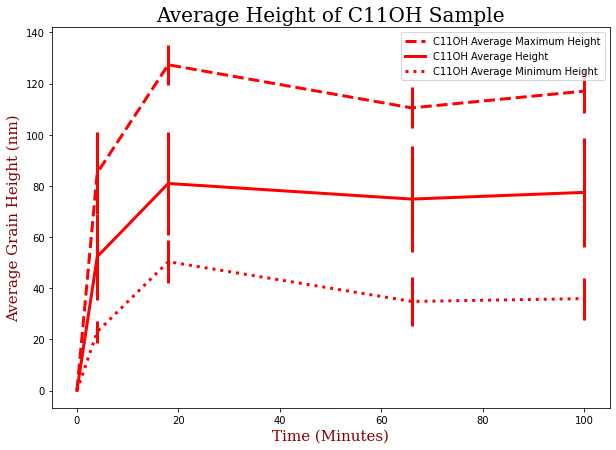

In [22]:
c11OH_times = np.array([0.000001, 4, 18, 66, 100])
c11OH_max_height = [c11OH_0_max_average_height,c11OH_4_max_average_height,c11OH_18_max_average_height,c11OH_66_max_average_height,c11OH_100_max_average_height]
c11OH_max_height_std = [0,c11OH_4_max_std_height,c11OH_18_max_std_height,c11OH_66_max_std_height,c11OH_100_max_std_height]
c11OH_average_height = [c11OH_0_mean_height,c11OH_4_mean_height,c11OH_18_mean_height,c11OH_66_mean_height,c11OH_100_mean_height]
c11OH_average_height_std = [0,c11OH_4_std_height,c11OH_18_std_height,c11OH_66_std_height,c11OH_100_std_height]
c11OH_min_height = [c11OH_0_min_average_height,c11OH_4_min_average_height,c11OH_18_min_average_height,c11OH_66_min_average_height,c11OH_100_min_average_height]
c11OH_min_height_std = [0,c11OH_4_min_std_height,c11OH_18_min_std_height,c11OH_66_min_std_height,c11OH_100_min_std_height]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c11OH_times, c11OH_max_height, lw=3, ls='dashed', color=(1.0, 0.0, 0.0), label='C11OH Average Maximum Height')
plt.errorbar(c11OH_times, c11OH_max_height, c11OH_max_height_std, lw=3, ls='', color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_average_height, lw=3, color=(1.0, 0.0, 0.0), linestyle='-', label='C11OH Average Height')
plt.errorbar(c11OH_times, c11OH_average_height, c11OH_average_height_std, ls='',lw=3, color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_min_height, lw=3, color=(1.0, 0.0, 0.0), linestyle=':', label='C11OH Average Minimum Height')
plt.errorbar(c11OH_times, c11OH_min_height, c11OH_min_height_std, ls='', lw=3, color=(1.0, 0.0, 0.0))

plt.title('Average Height of C11OH Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontdict = font2)
plt.legend()
plt.show()

# C11NF Data Processing

### Opening all csv's

In [23]:
with open('gwy_data/c11NF_6_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11NF_6_data = list(reader)
    c11NF_6_data = np.array(c11NF_6_data[0])
    c11NF_6_raw_data = c11NF_6_data.astype(float)
    
with open('gwy_data/c11NF_23_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11NF_23_data = list(reader)
    c11NF_23_data = np.array(c11NF_23_data[0])
    c11NF_23_raw_data = c11NF_23_data.astype(float)

with open('gwy_data/c11NF_51_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11NF_51_data = list(reader)
    c11NF_51_data = np.array(c11NF_51_data[0])
    c11NF_51_raw_data = c11NF_51_data.astype(float)

with open('gwy_data/c11NF_84_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11NF_84_data = list(reader)
    c11NF_84_data = np.array(c11NF_84_data[0])
    c11NF_84_raw_data = c11NF_84_data.astype(float)
    
with open('gwy_data/c11NF_102_full.txt', newline='') as f:
    reader = csv.reader(f)
    c11NF_102_data = list(reader)
    c11NF_102_data = np.array(c11NF_102_data[0])
    c11NF_102_raw_data = c11NF_102_data.astype(float)

### Running raw data through functions

In [24]:
c11NF_6_divided = divide_chunks(c11NF_6_raw_data)
c11NF_23_divided = divide_chunks(c11NF_23_raw_data)
c11NF_51_divided = divide_chunks(c11NF_51_raw_data)
c11NF_84_divided = divide_chunks(c11NF_84_raw_data)
c11NF_102_divided = divide_chunks(c11NF_102_raw_data)

c11NF_6_diams = get_diams(c11NF_6_divided)
c11NF_23_diams = get_diams(c11NF_23_divided)
c11NF_51_diams = get_diams(c11NF_51_divided)
c11NF_84_diams = get_diams(c11NF_84_divided)
c11NF_102_diams = get_diams(c11NF_102_divided)

c11NF_0_mean_diameter = 0.000001
c11NF_6_mean_diameter, c11NF_6_std_diameter = get_avg_and_std_diameter(c11NF_6_diams)
c11NF_23_mean_diameter, c11NF_23_std_diameter = get_avg_and_std_diameter(c11NF_23_diams)
c11NF_51_mean_diameter, c11NF_51_std_diameter = get_avg_and_std_diameter(c11NF_51_diams)
c11NF_84_mean_diameter, c11NF_84_std_diameter = get_avg_and_std_diameter(c11NF_84_diams)
c11NF_102_mean_diameter, c11NF_102_std_diameter = get_avg_and_std_diameter(c11NF_102_diams)

c11NF_6_height = get_heights(c11NF_6_divided)
c11NF_23_height = get_heights(c11NF_23_divided)
c11NF_51_height = get_heights(c11NF_51_divided)
c11NF_84_height = get_heights(c11NF_84_divided)
c11NF_102_height = get_heights(c11NF_102_divided)

c11NF_0_mean_height = 0.000001
c11NF_6_mean_height, c11NF_6_std_height = get_avg_and_std_height(c11NF_6_height)
c11NF_23_mean_height, c11NF_23_std_height = get_avg_and_std_height(c11NF_23_height)
c11NF_51_mean_height, c11NF_51_std_height = get_avg_and_std_height(c11NF_51_height)
c11NF_84_mean_height, c11NF_84_std_height = get_avg_and_std_height(c11NF_84_height)
c11NF_102_mean_height, c11NF_102_std_height = get_avg_and_std_height(c11NF_102_height)

c11NF_0_max_average_diam, c11NF_0_min_average_diam = 0.000001, 0.000001
c11NF_6_max_average_diam, c11NF_6_max_std_diam, c11NF_6_min_average_diam, c11NF_6_min_std_diam = max_min_diams(c11NF_6_diams)
c11NF_23_max_average_diam, c11NF_23_max_std_diam, c11NF_23_min_average_diam, c11NF_23_min_std_diam = max_min_diams(c11NF_23_diams)
c11NF_51_max_average_diam, c11NF_51_max_std_diam, c11NF_51_min_average_diam, c11NF_51_min_std_diam = max_min_diams(c11NF_51_diams)
c11NF_84_max_average_diam, c11NF_84_max_std_diam, c11NF_84_min_average_diam, c11NF_84_min_std_diam = max_min_diams(c11NF_84_diams)
c11NF_102_max_average_diam, c11NF_102_max_std_diam, c11NF_102_min_average_diam, c11NF_102_min_std_diam = max_min_diams(c11NF_102_diams)

c11NF_0_max_average_height, c11NF_0_min_average_height = 0.000001, 0.000001
c11NF_6_max_average_height, c11NF_6_max_std_height, c11NF_6_min_average_height, c11NF_6_min_std_height = max_min_heights(c11NF_6_height)
c11NF_23_max_average_height, c11NF_23_max_std_height, c11NF_23_min_average_height, c11NF_23_min_std_height = max_min_heights(c11NF_23_height)
c11NF_51_max_average_height, c11NF_51_max_std_height, c11NF_51_min_average_height, c11NF_51_min_std_height = max_min_heights(c11NF_51_height)
c11NF_84_max_average_height, c11NF_84_max_std_height, c11NF_84_min_average_height, c11NF_84_min_std_height = max_min_heights(c11NF_84_height)
c11NF_102_max_average_height, c11NF_102_max_std_height, c11NF_102_min_average_height, c11NF_102_min_std_height = max_min_heights(c11NF_102_height)

## C11NF Average Diameter Graph

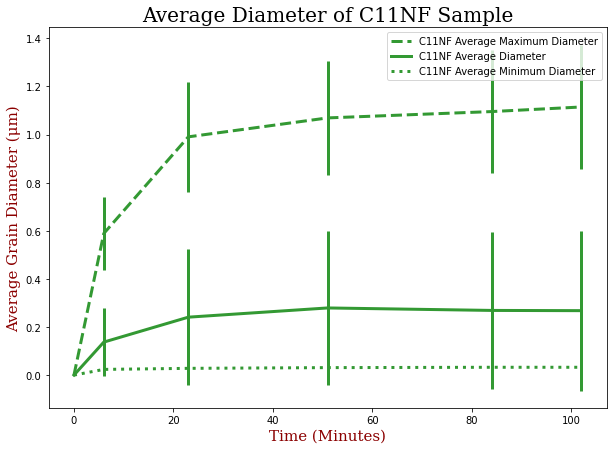

In [25]:
c11NF_times = np.array([0.000001, 6, 23, 51, 84, 102])
c11NF_max_diams = [c11NF_0_max_average_diam,c11NF_6_max_average_diam,c11NF_23_max_average_diam,c11NF_51_max_average_diam,c11NF_84_max_average_diam,c11NF_102_max_average_diam]
c11NF_max_diams_std = [0,c11NF_6_max_std_diam,c11NF_23_max_std_diam,c11NF_51_max_std_diam,c11NF_84_max_std_diam,c11NF_102_max_std_diam]
c11NF_average_diams = [c11NF_0_mean_diameter,c11NF_6_mean_diameter,c11NF_23_mean_diameter,c11NF_51_mean_diameter,c11NF_84_mean_diameter,c11NF_102_mean_diameter]
c11NF_average_diams_std = [0,c11NF_6_std_diameter,c11NF_23_std_diameter,c11NF_51_std_diameter,c11NF_84_std_diameter,c11NF_102_std_diameter]
c11NF_min_diams = [c11NF_0_min_average_diam,c11NF_6_min_average_diam, c11NF_23_min_average_diam,c11NF_51_min_average_diam,c11NF_84_min_average_diam,c11NF_102_min_average_diam]
c11NF_min_diams_std = [0,c11NF_6_min_std_diam,c11NF_23_min_std_diam,c11NF_51_min_std_diam,c11NF_84_min_std_diam,c11NF_102_min_std_diam]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c11NF_times, c11NF_max_diams, lw=3, ls='dashed', color=(0.2, 0.6, 0.2), label='C11NF Average Maximum Diameter')
plt.errorbar(c11NF_times, c11NF_max_diams, c11NF_max_diams_std, lw=3, ls='', color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_average_diams, lw=3, color=(0.2, 0.6, 0.2),linestyle='-', label='C11NF Average Diameter')
plt.errorbar(c11NF_times, c11NF_average_diams, c11NF_average_diams_std, ls='', lw=3, color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_min_diams, lw=3, color=(0.2, 0.6, 0.2), linestyle=':', label='C11NF Average Minimum Diameter')
plt.errorbar(c11NF_times, c11NF_min_diams, c11NF_min_diams_std, lw=3, ls='', color=(0.2, 0.6, 0.2))

plt.title('Average Diameter of C11NF Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontdict = font2)
plt.legend()
plt.show()

## C11NF Average Height Graph

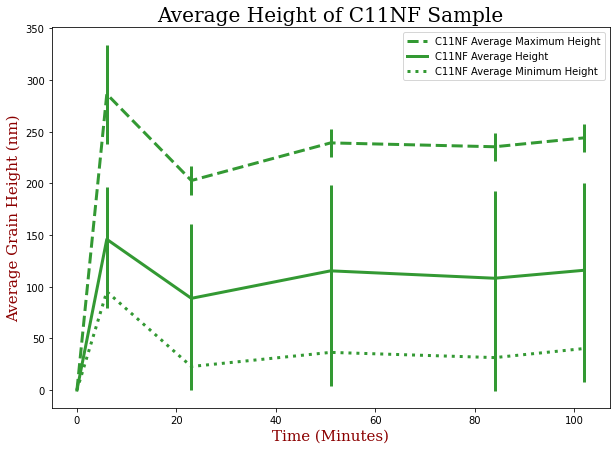

In [26]:
c11NF_times = np.array([0.000001, 6, 23, 51, 84, 102])
c11NF_max_height = [c11NF_0_max_average_height,c11NF_6_max_average_height,c11NF_23_max_average_height,c11NF_51_max_average_height,c11NF_84_max_average_height,c11NF_102_max_average_height]
c11NF_max_height_std = [0,c11NF_6_max_std_height,c11NF_23_max_std_height,c11NF_51_max_std_height,c11NF_84_max_std_height,c11NF_102_max_std_height]
c11NF_average_height = [c11NF_0_mean_height,c11NF_6_mean_height,c11NF_23_mean_height,c11NF_51_mean_height,c11NF_84_mean_height,c11NF_102_mean_height]
c11NF_average_height_std = [0,c11NF_6_std_height,c11NF_23_std_height,c11NF_51_std_height,c11NF_84_std_height,c11NF_102_std_height]
c11NF_min_height = [c11NF_0_min_average_height,c11NF_6_min_average_height,c11NF_23_min_average_height,c11NF_51_min_average_height,c11NF_84_min_average_height,c11NF_102_min_average_height]
c11NF_min_height_std = [0,c11NF_6_min_std_height,c11NF_23_min_std_height,c11NF_51_min_std_height,c11NF_84_min_std_height,c11NF_102_min_std_height]

font1 = {'family':'serif','color':'black','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(10,7))

plt.plot(c11NF_times, c11NF_max_height, lw=3, ls='dashed', color=(0.2, 0.6, 0.2), label='C11NF Average Maximum Height')
plt.errorbar(c11NF_times, c11NF_max_height, c11NF_max_height_std, lw=3, ls='', color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_average_height, lw=3, color=(0.2, 0.6, 0.2), linestyle='-', label='C11NF Average Height')
plt.errorbar(c11NF_times, c11NF_average_height, c11NF_average_height_std, ls='',lw=3, color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_min_height, lw=3, color=(0.2, 0.6, 0.2), linestyle=':', label='C11NF Average Minimum Height')
plt.errorbar(c11NF_times, c11NF_min_height, c11NF_min_height_std, ls='', lw=3, color=(0.2, 0.6, 0.2))

plt.title('Average Height of C11NF Sample', fontdict = font1)
plt.xlabel('Time (Minutes)', fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontdict = font2)
plt.legend()
plt.show()

## Grain Diameters of C11/C11OH/C11NF Plotted

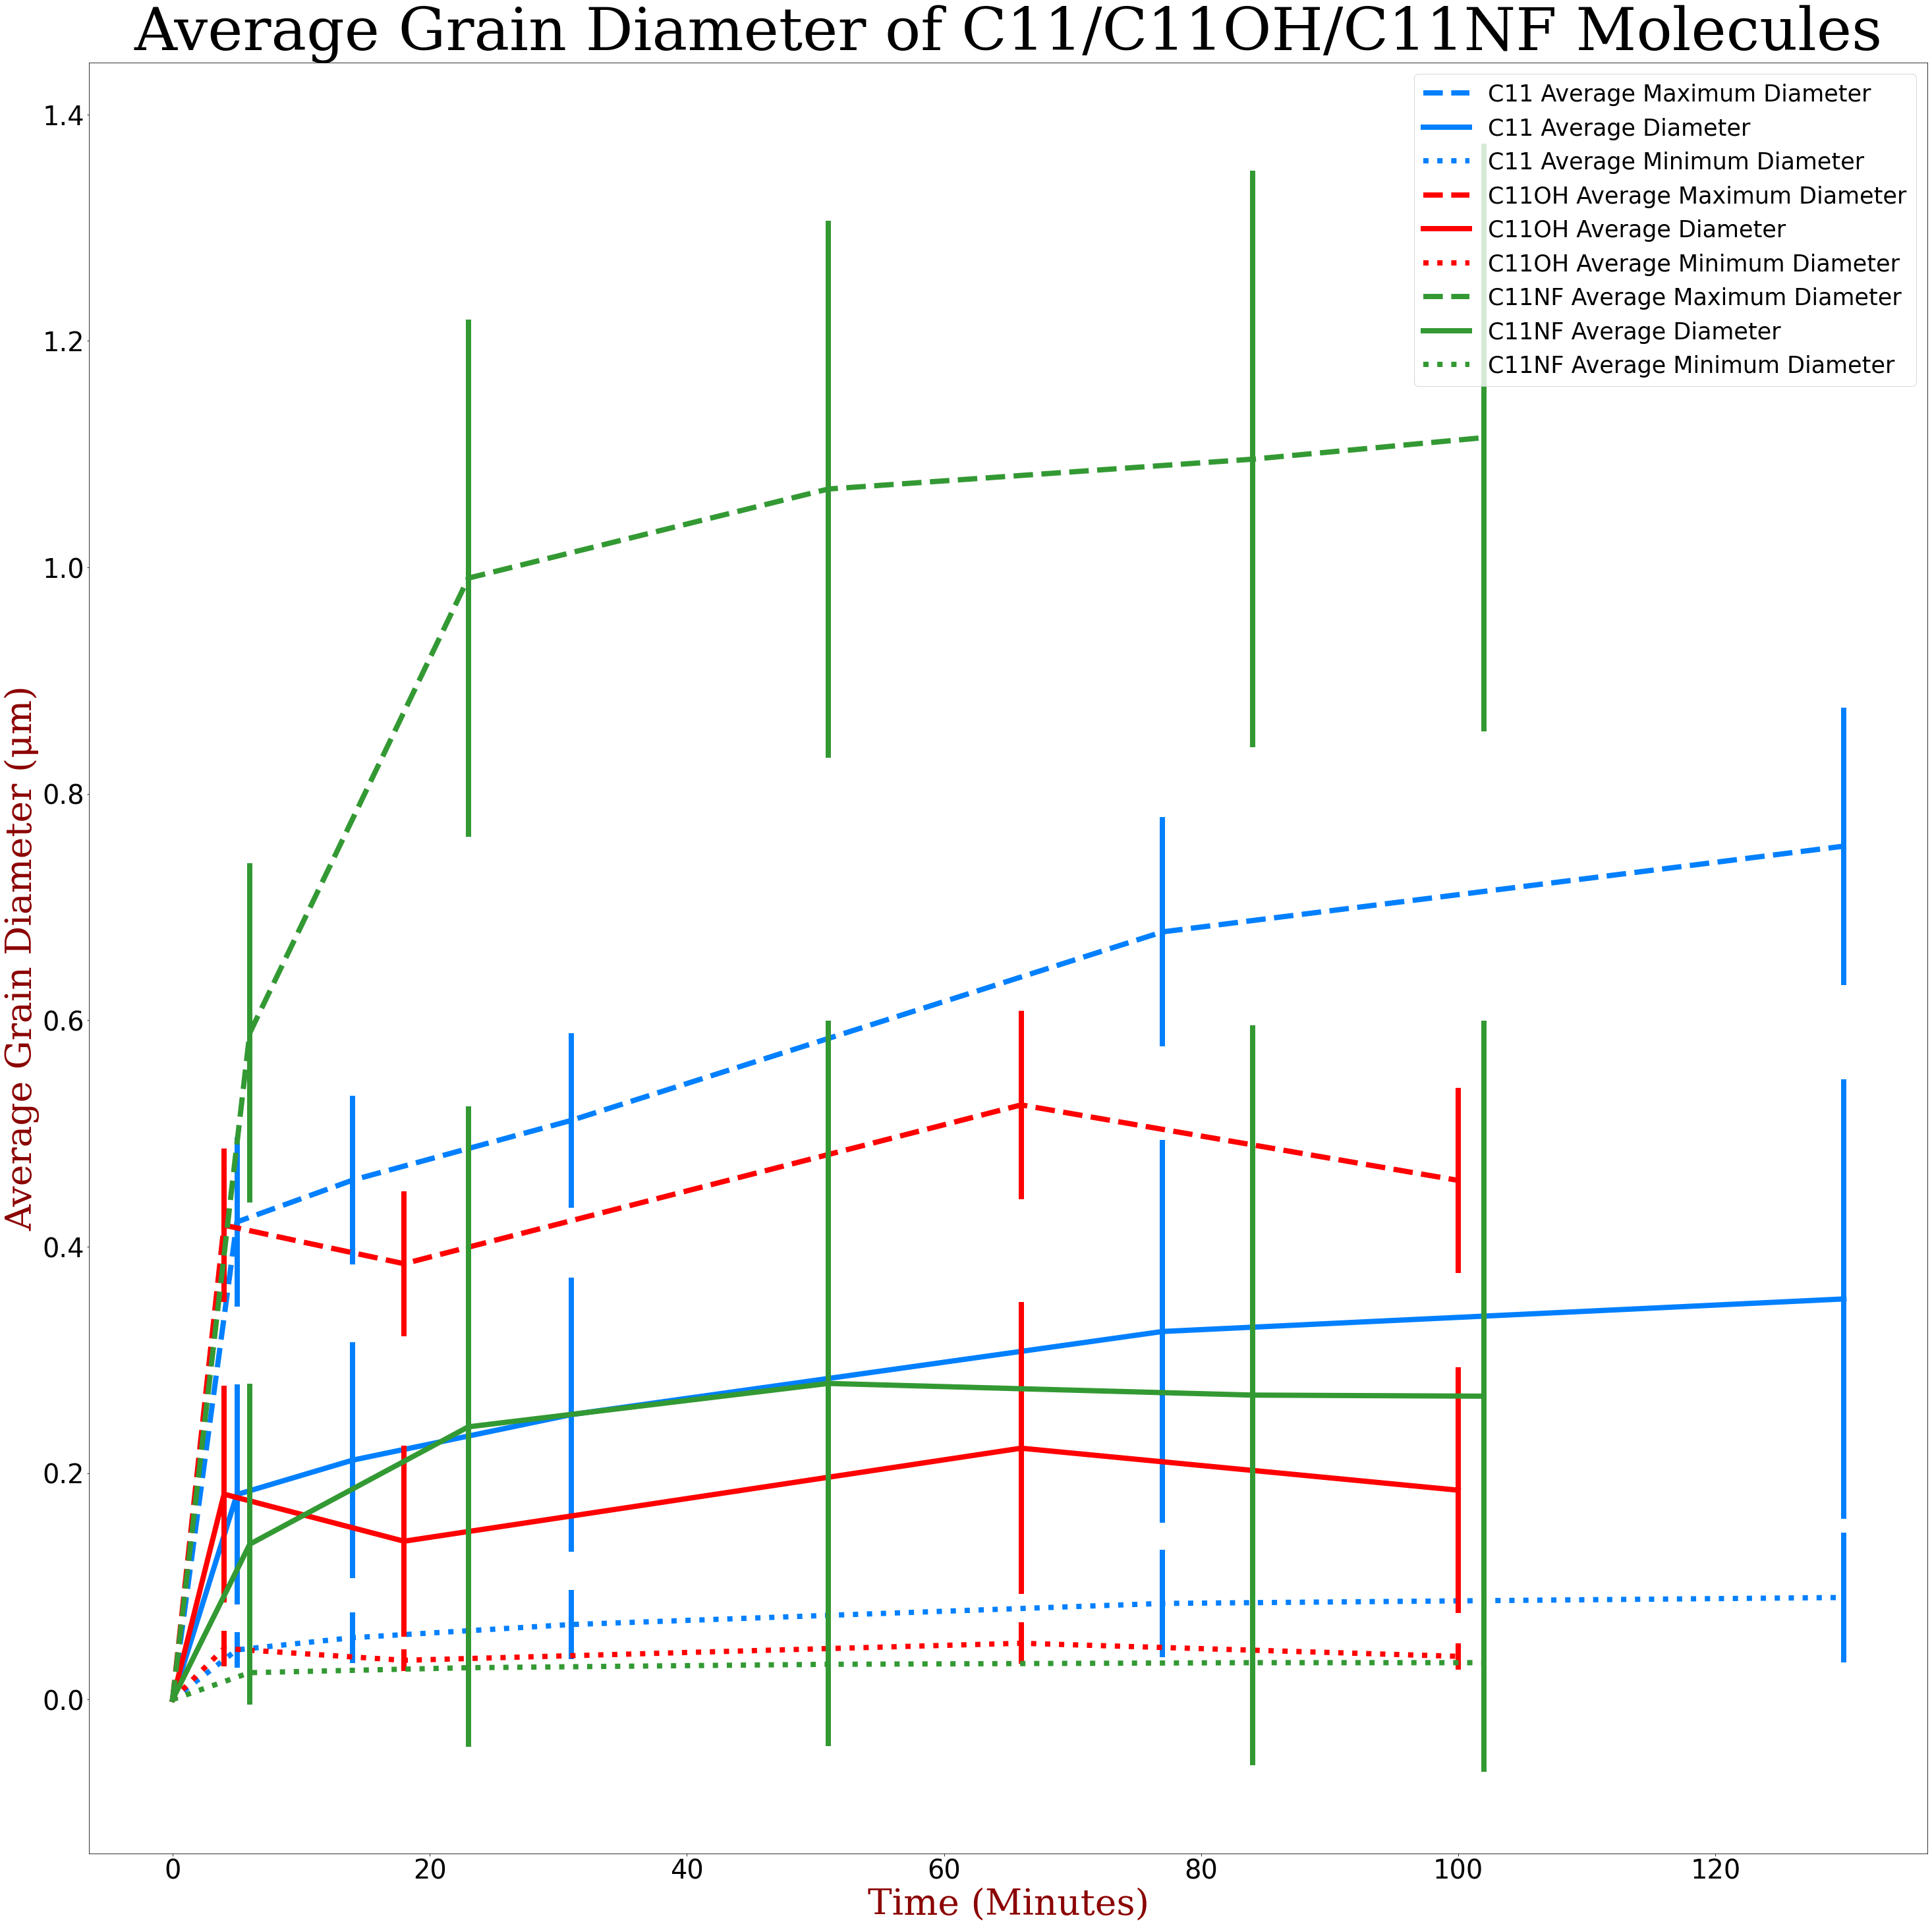

In [27]:
c11_times = np.array([0.000001, 5, 14,31, 77, 130])
c11OH_times =  np.array([0.000001, 4, 18, 66, 100])
c11NF_times = np.array([0.000001, 6, 23, 51, 84, 102])

c11_max_diams = [c11_0_max_average_diam,c11_5_max_average_diam,c11_14_max_average_diam,c11_31_max_average_diam,c11_77_max_average_diam,c11_130_max_average_diam]
c11_max_diams_std = [0,c11_5_max_std_diam,c11_14_max_std_diam,c11_31_max_std_diam,c11_77_max_std_diam,c11_130_max_std_diam]
c11_average_diams = [c11_0_mean_diameter,c11_5_mean_diameter,c11_14_mean_diameter,c11_31_mean_diameter,c11_77_mean_diameter,c11_130_mean_diameter]
c11_average_diams_std = [0,c11_5_std_diameter,c11_14_std_diameter,c11_31_std_diameter,c11_77_std_diameter,c11_130_std_diameter]
c11_min_diams = [c11_0_min_average_diam,c11_5_min_average_diam,c11_14_min_average_diam,c11_31_min_average_diam,c11_77_min_average_diam,c11_130_min_average_diam]
c11_min_diams_std = [0,c11_5_min_std_diam,c11_14_min_std_diam,c11_31_min_std_diam,c11_77_min_std_diam,c11_130_min_std_diam]

c11OH_max_diams = [c11OH_0_max_average_diam,c11OH_4_max_average_diam,c11OH_18_max_average_diam,c11OH_66_max_average_diam,c11OH_100_max_average_diam]
c11OH_max_diams_std = [0,c11OH_4_max_std_diam,c11OH_18_max_std_diam,c11OH_66_max_std_diam,c11OH_100_max_std_diam]
c11OH_average_diams = [c11OH_0_mean_diameter,c11OH_4_mean_diameter,c11OH_18_mean_diameter,c11OH_66_mean_diameter,c11OH_100_mean_diameter]
c11OH_average_diams_std = [0,c11OH_4_std_diameter,c11OH_18_std_diameter,c11OH_66_std_diameter,c11OH_100_std_diameter]
c11OH_min_diams = [c11OH_0_min_average_diam,c11OH_4_min_average_diam,c11OH_18_min_average_diam,c11OH_66_min_average_diam,c11OH_100_min_average_diam]
c11OH_min_diams_std = [0,c11OH_4_min_std_diam,c11OH_18_min_std_diam,c11OH_66_min_std_diam,c11OH_100_min_std_diam] 

c11NF_max_diams = [c11NF_0_max_average_diam,c11NF_6_max_average_diam,c11NF_23_max_average_diam,c11NF_51_max_average_diam,c11NF_84_max_average_diam,c11NF_102_max_average_diam]
c11NF_max_diams_std = [0,c11NF_6_max_std_diam,c11NF_23_max_std_diam,c11NF_51_max_std_diam,c11NF_84_max_std_diam,c11NF_102_max_std_diam]
c11NF_average_diams = [c11NF_0_mean_diameter,c11NF_6_mean_diameter,c11NF_23_mean_diameter,c11NF_51_mean_diameter,c11NF_84_mean_diameter,c11NF_102_mean_diameter]
c11NF_average_diams_std = [0,c11NF_6_std_diameter,c11NF_23_std_diameter,c11NF_51_std_diameter,c11NF_84_std_diameter,c11NF_102_std_diameter]
c11NF_min_diams = [c11NF_0_min_average_diam,c11NF_6_min_average_diam, c11NF_23_min_average_diam,c11NF_51_min_average_diam,c11NF_84_min_average_diam,c11NF_102_min_average_diam]
c11NF_min_diams_std = [0,c11NF_6_min_std_diam,c11NF_23_min_std_diam,c11NF_51_min_std_diam,c11NF_84_min_std_diam,c11NF_102_min_std_diam]

plt.figure(figsize=(50,50))

plt.plot(c11_times, c11_max_diams, lw=8, ls='dashed', color=(0.0, 0.5, 1.0), label='C11 Average Maximum Diameter')
plt.errorbar(c11_times, c11_max_diams, c11_max_diams_std, lw=8, ls='', color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_average_diams, lw=8, color=(0.0, 0.5, 1.0), linestyle='-', label='C11 Average Diameter')
plt.errorbar(c11_times, c11_average_diams, c11_average_diams_std, ls='',lw=8, color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_min_diams, lw=8, color=(0.0, 0.5, 1.0), linestyle=':', label='C11 Average Minimum Diameter')
plt.errorbar(c11_times, c11_min_diams, c11_min_diams_std, ls='', lw=8, color=(0.0, 0.5, 1.0))

plt.plot(c11OH_times, c11OH_max_diams, lw=8, ls='dashed', color=(1.0, 0.0, 0.0), label='C11OH Average Maximum Diameter')
plt.errorbar(c11OH_times, c11OH_max_diams, c11OH_max_diams_std, lw=8, ls='', color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_average_diams, lw=8, color=(1.0, 0.0, 0.0), linestyle='-', label='C11OH Average Diameter')
plt.errorbar(c11OH_times, c11OH_average_diams, c11OH_average_diams_std, ls='',lw=8, color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_min_diams, lw=8, color=(1.0, 0.0, 0.0), linestyle=':', label='C11OH Average Minimum Diameter')
plt.errorbar(c11OH_times, c11OH_min_diams, c11OH_min_diams_std, lw=8, ls='', color=(1.0, 0.0, 0.0))

plt.plot(c11NF_times, c11NF_max_diams, lw=8, ls='dashed', color=(0.2, 0.6, 0.2), label='C11NF Average Maximum Diameter')
plt.errorbar(c11NF_times, c11NF_max_diams, c11NF_max_diams_std, lw=8, ls='', color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_average_diams, lw=8, color=(0.2, 0.6, 0.2),linestyle='-', label='C11NF Average Diameter')
plt.errorbar(c11NF_times, c11NF_average_diams, c11NF_average_diams_std, ls='', lw=8, color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_min_diams, lw=8, color=(0.2, 0.6, 0.2), linestyle=':', label='C11NF Average Minimum Diameter')
plt.errorbar(c11NF_times, c11NF_min_diams, c11NF_min_diams_std, lw=8, ls='', color=(0.2, 0.6, 0.2))


plt.title('Average Grain Diameter of C11/C11OH/C11NF Molecules', fontsize=90, fontdict = font1)
plt.xlabel('Time (Minutes)', fontsize=55, fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontsize=55, fontdict = font2)
plt.xticks(fontsize=40, rotation=0)
plt.yticks(fontsize=40, rotation=0)
plt.legend(loc='upper right' ,fontsize=35)
plt.show()

## Grain Diameters of C3/C7/C7OH Plotted

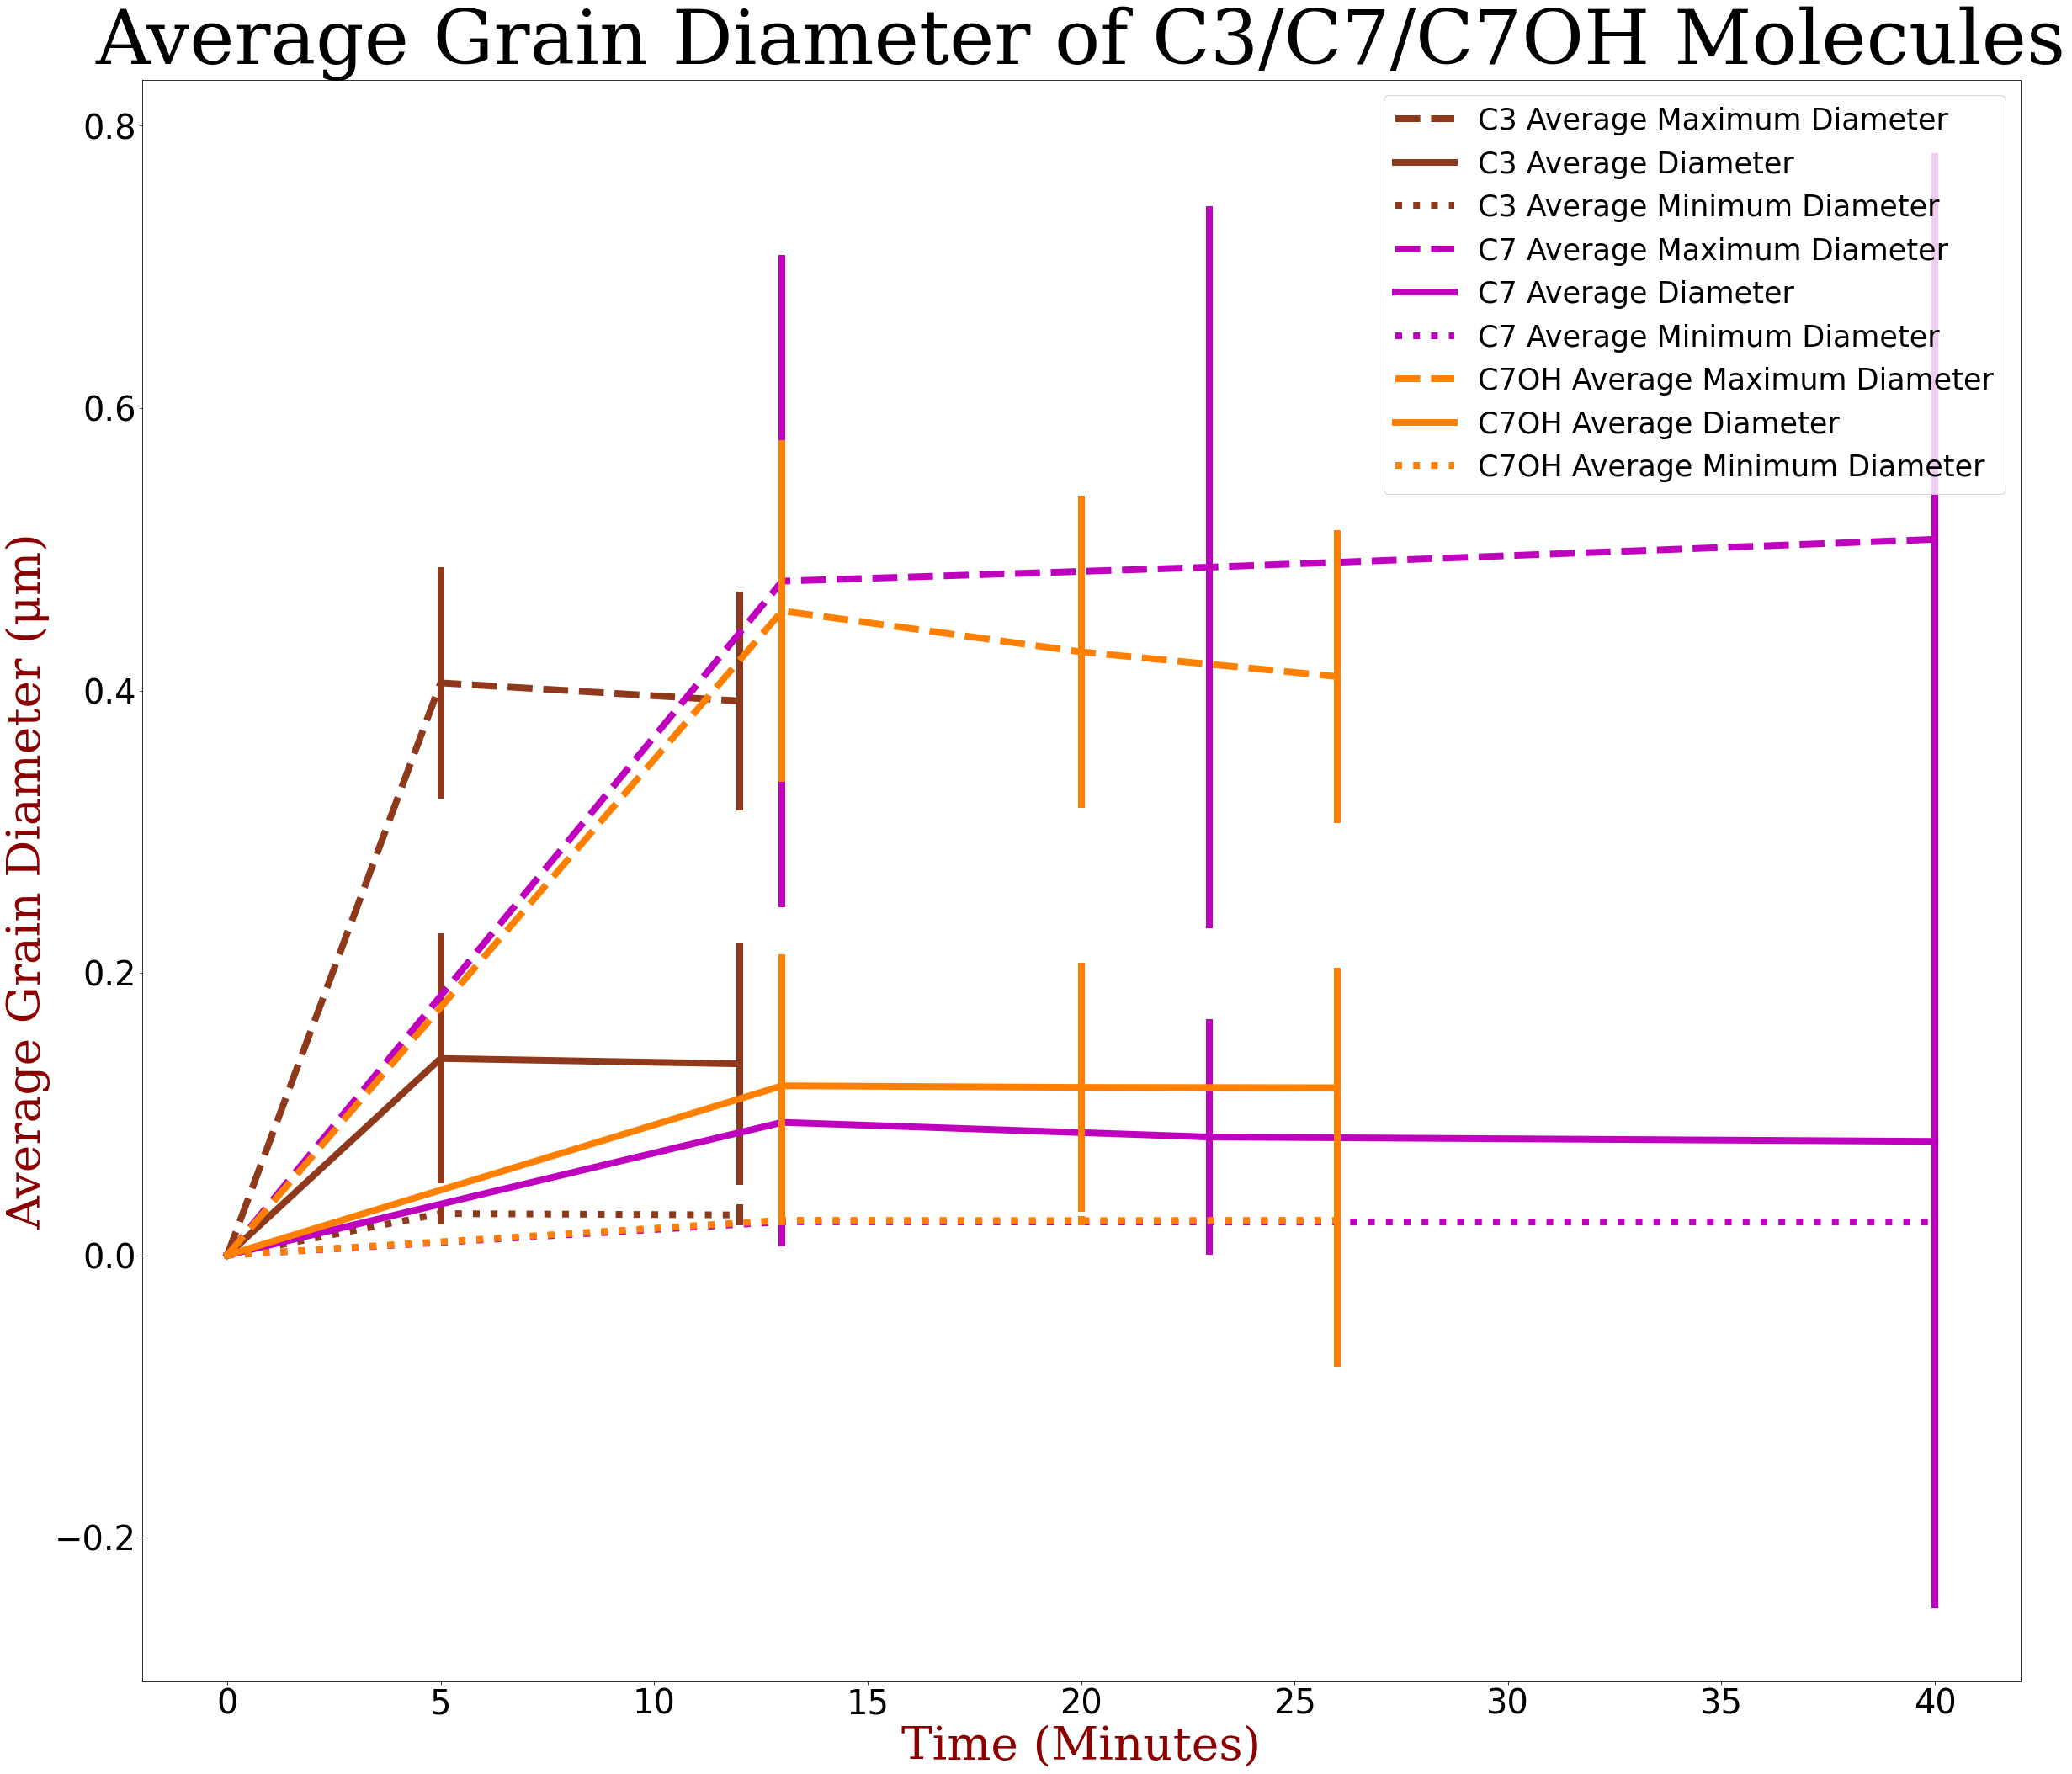

In [28]:
c3_times = np.array([0.000001, 5, 12])
c7_times = np.array([0.000001, 13, 23, 40])
c7OH_times = np.array([0.000001, 13, 20, 26])

c3_max_diams = [c3_0_max_average_diam,c3_5_max_average_diam,c3_12_max_average_diam]
c3_max_diams_std = [0,c3_5_max_std_diam,c3_12_max_std_diam]
c3_average_diams = [c3_0_mean_diameter,c3_5_mean_diameter,c3_12_mean_diameter]
c3_average_diams_std = [0,c3_5_std_diameter,c3_12_std_diameter]
c3_min_diams = [c3_0_min_average_diam,c3_5_min_average_diam,c3_12_min_average_diam]
c3_min_diams_std = [0,c3_5_min_std_diam,c3_12_min_std_diam]

c7_max_diams = [c7_0_max_average_diam,c7_13_max_average_diam,c7_23_max_average_diam,c7_40_max_average_diam]
c7_max_diams_std = [0,c7_13_max_std_diam,c7_23_max_std_diam,c7_40_max_std_diam]
c7_average_diams = [c7_0_mean_diameter,c7_13_mean_diameter,c7_23_mean_diameter,c7_40_mean_diameter]
c7_average_diams_std = [0,c7_13_std_diameter,c7_23_std_diameter,c7_40_std_diameter]
c7_min_diams = [c7_0_min_average_diam,c7_13_min_average_diam,c7_23_min_average_diam,c7_40_min_average_diam]
c7_min_diams_std = [0,c7_13_min_std_diam,c7_23_min_std_diam,c7_40_max_std_diam]

c7OH_max_diams = [c7OH_0_max_average_diam,c7OH_13_max_average_diam,c7OH_20_max_average_diam,c7OH_26_max_average_diam]
c7OH_max_diams_std = [0,c7OH_13_max_std_diam,c7OH_20_max_std_diam,c7OH_26_max_std_diam]
c7OH_average_diams = [c7OH_0_mean_diameter,c7OH_13_mean_diameter,c7OH_20_mean_diameter,c7OH_26_mean_diameter]
c7OH_average_diams_std = [0,c7OH_13_std_diameter,c7OH_20_std_diameter,c7OH_26_std_diameter]
c7OH_min_diams = [c7OH_0_min_average_diam,c7OH_13_min_average_diam,c7OH_20_min_average_diam,c7OH_26_min_average_diam]
c7OH_min_diams_std = [0,c7OH_13_min_std_diam,c7OH_20_min_std_diam,c7OH_26_max_std_diam]

plt.figure(figsize=(40,35))

plt.plot(c3_times, c3_max_diams, lw=8, ls='dashed', color=(0.555, 0.222, 0.111), label='C3 Average Maximum Diameter')
plt.errorbar(c3_times, c3_max_diams, c3_max_diams_std, lw=8, ls='', color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_average_diams, lw=8, color=(0.555, 0.222, 0.111), linestyle='-', label='C3 Average Diameter')
plt.errorbar(c3_times, c3_average_diams, c3_average_diams_std, ls='',lw=8, color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_min_diams, lw=8, color=(0.555, 0.222, 0.111), linestyle=':', label='C3 Average Minimum Diameter')
plt.errorbar(c3_times, c3_min_diams, c3_min_diams_std, ls='', lw=8, color=(0.555, 0.222, 0.111))

plt.plot(c7_times, c7_max_diams, lw=8, ls='dashed', color=(0.75, 0.0, 0.75), label='C7 Average Maximum Diameter')
plt.errorbar(c7_times, c7_max_diams, c7_max_diams_std, lw=8, ls='', color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_average_diams, lw=8, color=(0.75, 0.0, 0.75), linestyle='-', label='C7 Average Diameter')
plt.errorbar(c7_times, c7_average_diams, c7_average_diams_std, ls='',lw=8, color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_min_diams, lw=8, color=(0.75, 0.0, 0.75), linestyle=':', label='C7 Average Minimum Diameter')
plt.errorbar(c7_times, c7_min_diams, c7_min_diams_std, ls='', lw=8, color=(0.75, 0.0, 0.75))

plt.plot(c7OH_times, c7OH_max_diams, lw=8, ls='dashed', color=(1.0, 0.5, 0.0), label='C7OH Average Maximum Diameter')
plt.errorbar(c7OH_times, c7OH_max_diams, c7OH_max_diams_std, lw=8, ls='', color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_average_diams, lw=8, color=(1.0, 0.5, 0.0), linestyle='-', label='C7OH Average Diameter')
plt.errorbar(c7OH_times, c7OH_average_diams, c7OH_average_diams_std, ls='',lw=8, color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_min_diams, lw=8, color=(1.0, 0.5, 0.0), linestyle=':', label='C7OH Average Minimum Diameter')
plt.errorbar(c7OH_times, c7OH_min_diams, c7OH_min_diams_std, ls='', lw=8, color=(1.0, 0.5, 0.0))

plt.title('Average Grain Diameter of C3/C7/C7OH Molecules', fontsize=90, fontdict = font1)
plt.xlabel('Time (Minutes)', fontsize=55, fontdict = font2)
plt.ylabel('Average Grain Diameter (μm)', fontsize=55, fontdict = font2)
plt.xticks(fontsize=40, rotation=0)
plt.yticks(fontsize=40, rotation=0)
plt.legend(loc='upper right' ,fontsize=35)
plt.show()

## Grain Heights of C11/C11OH/C11NF Molecules Plotted

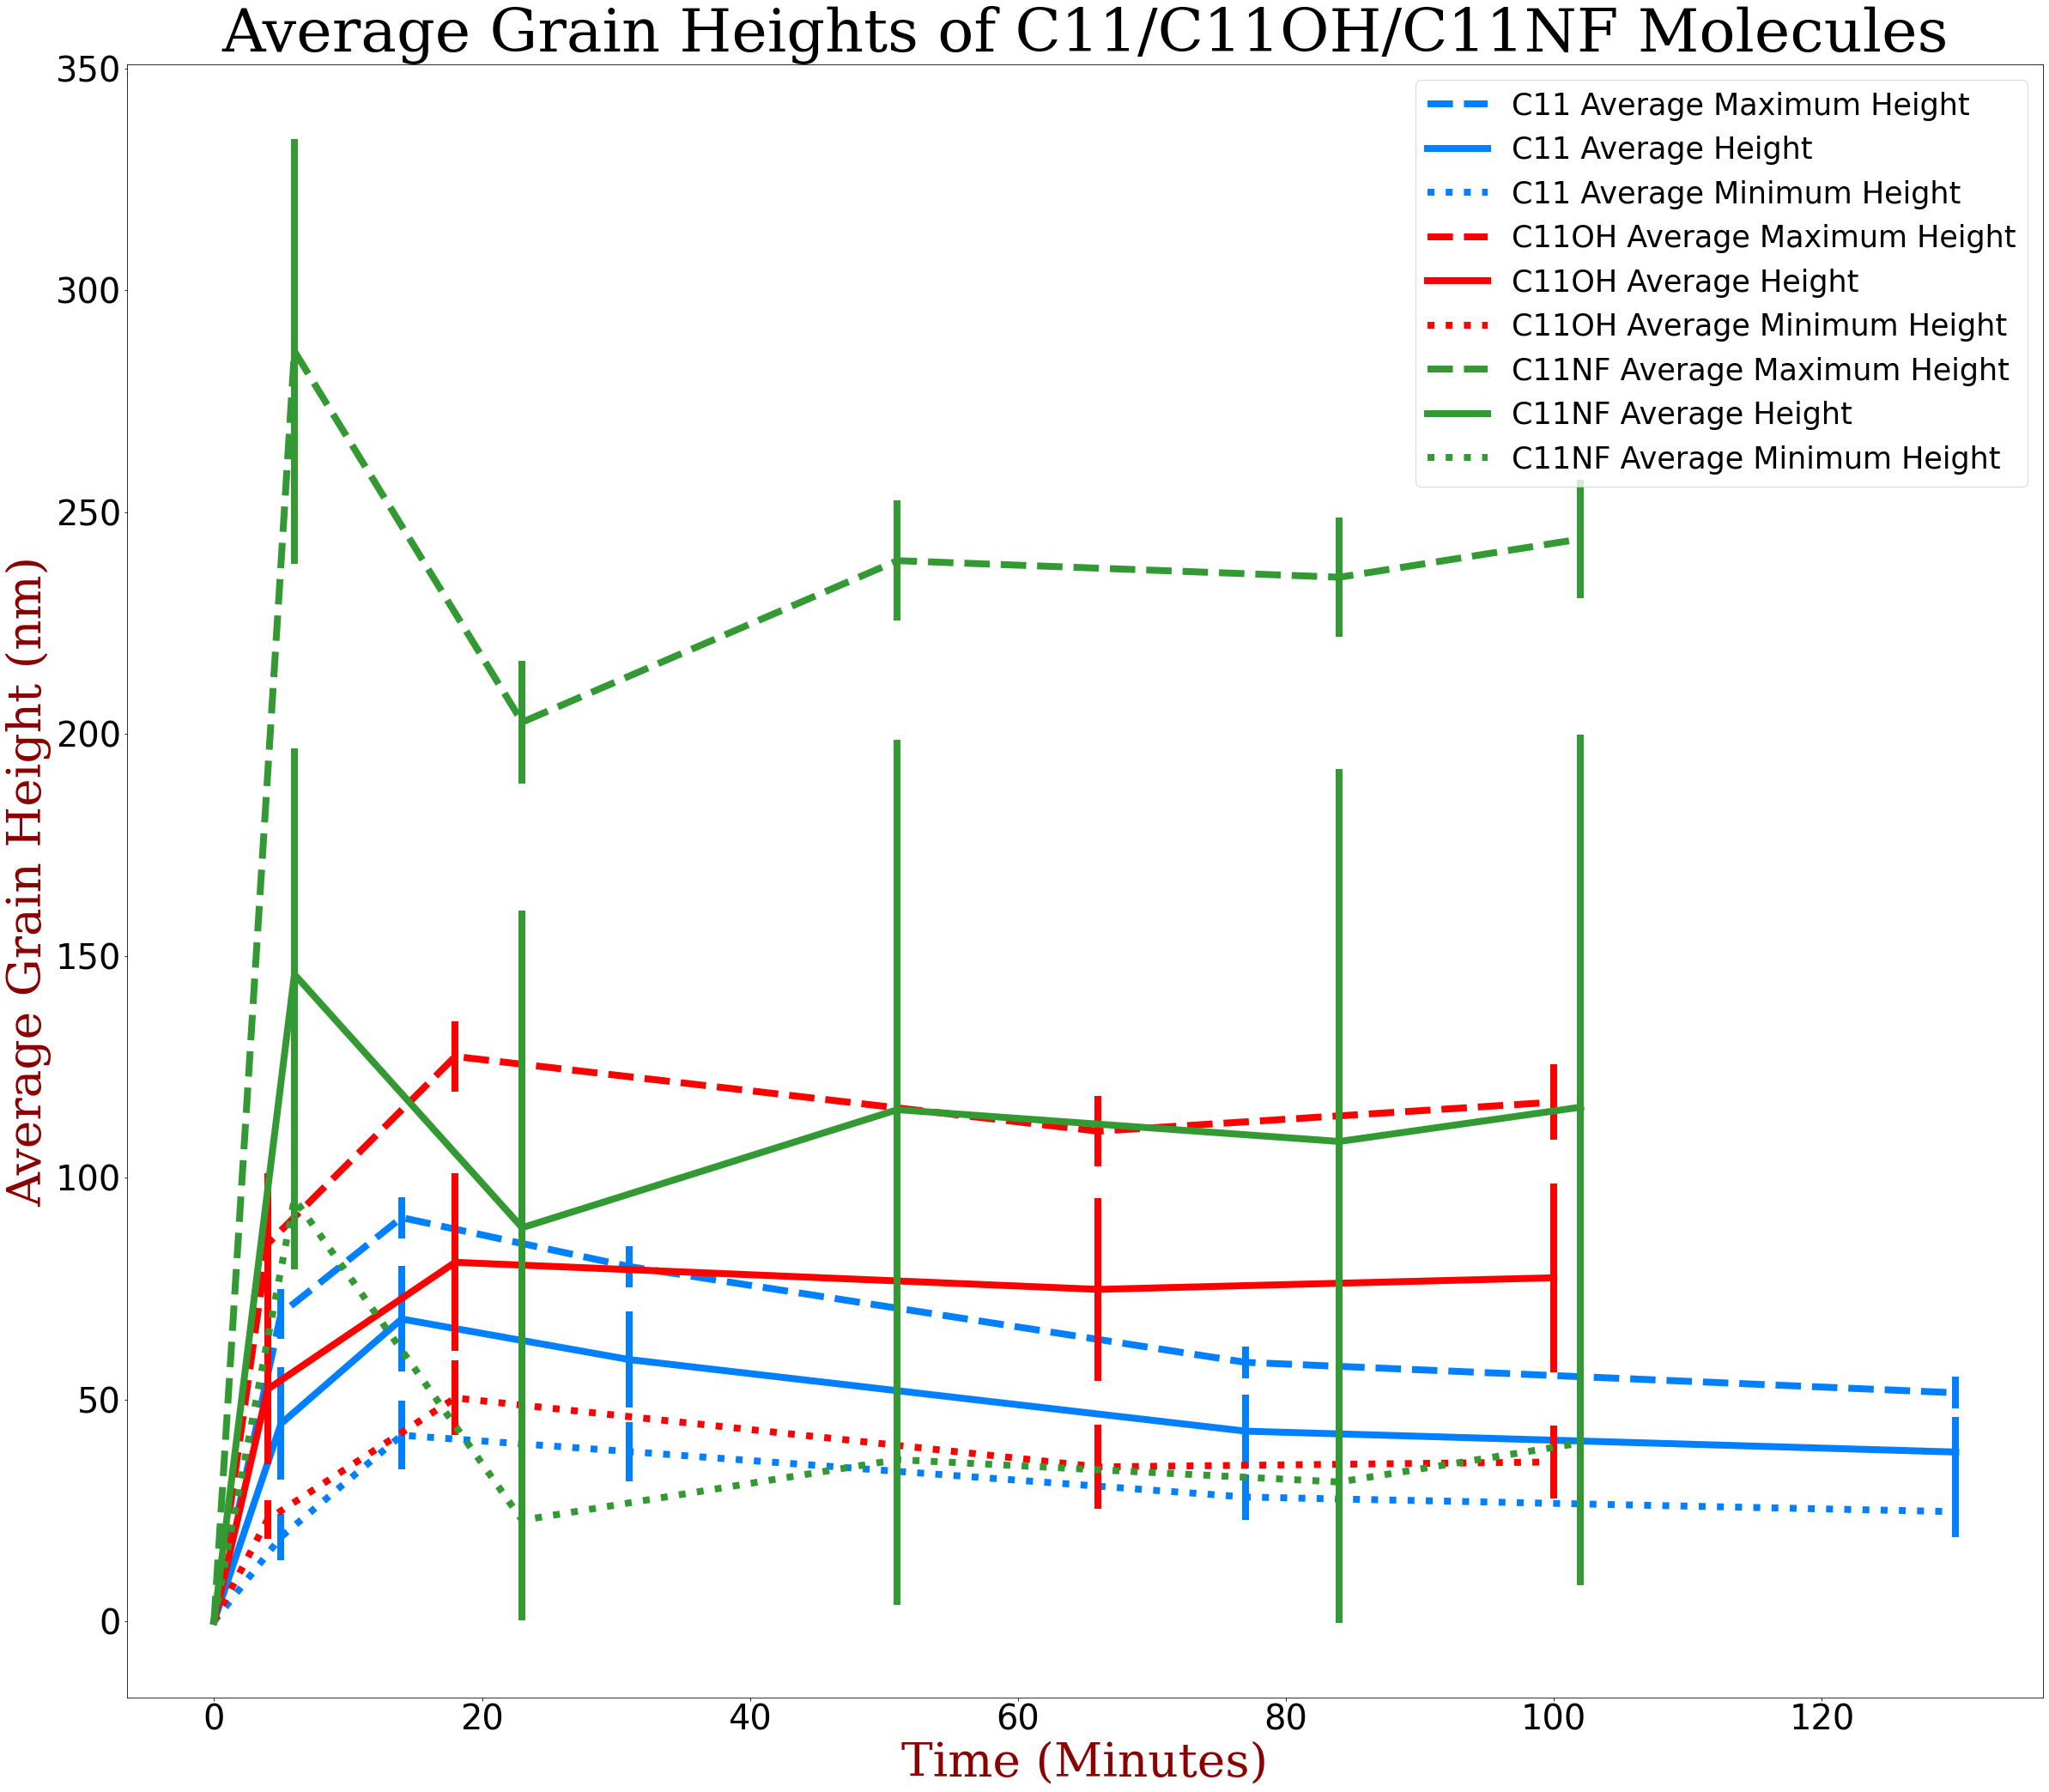

In [29]:
c11_times = np.array([0.000001, 5, 14,31, 77, 130])
c11_max_height = [c11_0_max_average_height,c11_5_max_average_height,c11_14_max_average_height,c11_31_max_average_height,c11_77_max_average_height,c11_130_max_average_height]
c11_max_height_std = [0,c11_5_max_std_height,c11_14_max_std_height,c11_31_max_std_height,c11_77_max_std_height,c11_130_max_std_height]
c11_average_height = [c11_0_mean_height,c11_5_mean_height,c11_14_mean_height,c11_31_mean_height,c11_77_mean_height,c11_130_mean_height]
c11_average_height_std = [0,c11_5_std_height,c11_14_std_height,c11_31_std_height,c11_77_std_height,c11_130_std_height]
c11_min_height = [c11_0_min_average_height,c11_5_min_average_height,c11_14_min_average_height,c11_31_min_average_height,c11_77_min_average_height,c11_130_min_average_height]
c11_min_height_std = [0,c11_5_min_std_height,c11_14_min_std_height,c11_31_min_std_height,c11_77_min_std_height,c11_130_min_std_height]

c11OH_times = np.array([0.000001, 4, 18, 66, 100])
c11OH_max_height = [c11OH_0_max_average_height,c11OH_4_max_average_height,c11OH_18_max_average_height,c11OH_66_max_average_height,c11OH_100_max_average_height]
c11OH_max_height_std = [0,c11OH_4_max_std_height,c11OH_18_max_std_height,c11OH_66_max_std_height,c11OH_100_max_std_height]
c11OH_average_height = [c11OH_0_mean_height,c11OH_4_mean_height,c11OH_18_mean_height,c11OH_66_mean_height,c11OH_100_mean_height]
c11OH_average_height_std = [0,c11OH_4_std_height,c11OH_18_std_height,c11OH_66_std_height,c11OH_100_std_height]
c11OH_min_height = [c11OH_0_min_average_height,c11OH_4_min_average_height,c11OH_18_min_average_height,c11OH_66_min_average_height,c11OH_100_min_average_height]
c11OH_min_height_std = [0,c11OH_4_min_std_height,c11OH_18_min_std_height,c11OH_66_min_std_height,c11OH_100_min_std_height]

c11NF_times = np.array([0.000001, 6, 23, 51, 84, 102])
c11NF_max_height = [c11NF_0_max_average_height,c11NF_6_max_average_height,c11NF_23_max_average_height,c11NF_51_max_average_height,c11NF_84_max_average_height,c11NF_102_max_average_height]
c11NF_max_height_std = [0,c11NF_6_max_std_height,c11NF_23_max_std_height,c11NF_51_max_std_height,c11NF_84_max_std_height,c11NF_102_max_std_height]
c11NF_average_height = [c11NF_0_mean_height,c11NF_6_mean_height,c11NF_23_mean_height,c11NF_51_mean_height,c11NF_84_mean_height,c11NF_102_mean_height]
c11NF_average_height_std = [0,c11NF_6_std_height,c11NF_23_std_height,c11NF_51_std_height,c11NF_84_std_height,c11NF_102_std_height]
c11NF_min_height = [c11NF_0_min_average_height,c11NF_6_min_average_height,c11NF_23_min_average_height,c11NF_51_min_average_height,c11NF_84_min_average_height,c11NF_102_min_average_height]
c11NF_min_height_std = [0,c11NF_6_min_std_height,c11NF_23_min_std_height,c11NF_51_min_std_height,c11NF_84_min_std_height,c11NF_102_min_std_height]

plt.figure(figsize=(40,35))

plt.plot(c11_times, c11_max_height, lw=8, ls='dashed', color=(0.0, 0.5, 1.0), label='C11 Average Maximum Height')
plt.errorbar(c11_times, c11_max_height, c11_max_height_std, lw=8, ls='', color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_average_height, lw=8, color=(0.0, 0.5, 1.0), linestyle='-', label='C11 Average Height')
plt.errorbar(c11_times, c11_average_height, c11_average_height_std, ls='',lw=8, color=(0.0, 0.5, 1.0))
plt.plot(c11_times, c11_min_height, lw=8, color=(0.0, 0.5, 1.0), linestyle=':', label='C11 Average Minimum Height')
plt.errorbar(c11_times, c11_min_height, c11_min_height_std, ls='', lw=8, color=(0.0, 0.5, 1.0))

plt.plot(c11OH_times, c11OH_max_height, lw=8, ls='dashed', color=(1.0, 0.0, 0.0), label='C11OH Average Maximum Height')
plt.errorbar(c11OH_times, c11OH_max_height, c11OH_max_height_std, lw=8, ls='', color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_average_height, lw=8, color=(1.0, 0.0, 0.0), linestyle='-', label='C11OH Average Height')
plt.errorbar(c11OH_times, c11OH_average_height, c11OH_average_height_std, ls='',lw=8, color=(1.0, 0.0, 0.0))
plt.plot(c11OH_times, c11OH_min_height, lw=8, color=(1.0, 0.0, 0.0), linestyle=':', label='C11OH Average Minimum Height')
plt.errorbar(c11OH_times, c11OH_min_height, c11OH_min_height_std, ls='', lw=8, color=(1.0, 0.0, 0.0))

plt.plot(c11NF_times, c11NF_max_height, lw=8, ls='dashed', color=(0.2, 0.6, 0.2), label='C11NF Average Maximum Height')
plt.errorbar(c11NF_times, c11NF_max_height, c11NF_max_height_std, lw=8, ls='', color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_average_height, lw=8, color=(0.2, 0.6, 0.2), linestyle='-', label='C11NF Average Height')
plt.errorbar(c11NF_times, c11NF_average_height, c11NF_average_height_std, ls='',lw=8, color=(0.2, 0.6, 0.2))
plt.plot(c11NF_times, c11NF_min_height, lw=8, color=(0.2, 0.6, 0.2), linestyle=':', label='C11NF Average Minimum Height')
plt.errorbar(c11NF_times, c11NF_min_height, c11NF_min_height_std, ls='', lw=8, color=(0.2, 0.6, 0.2))

plt.title('Average Grain Heights of C11/C11OH/C11NF Molecules', fontsize=70, fontdict = font1)
plt.xlabel('Time (Minutes)', fontsize=55, fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontsize=55, fontdict = font2)
plt.xticks(fontsize=40, rotation=0)
plt.yticks(fontsize=40, rotation=0)
plt.legend(loc='upper right' ,fontsize=35)
plt.show()

## Grain Heights of C3/C7/C7OH Molecules Plotted

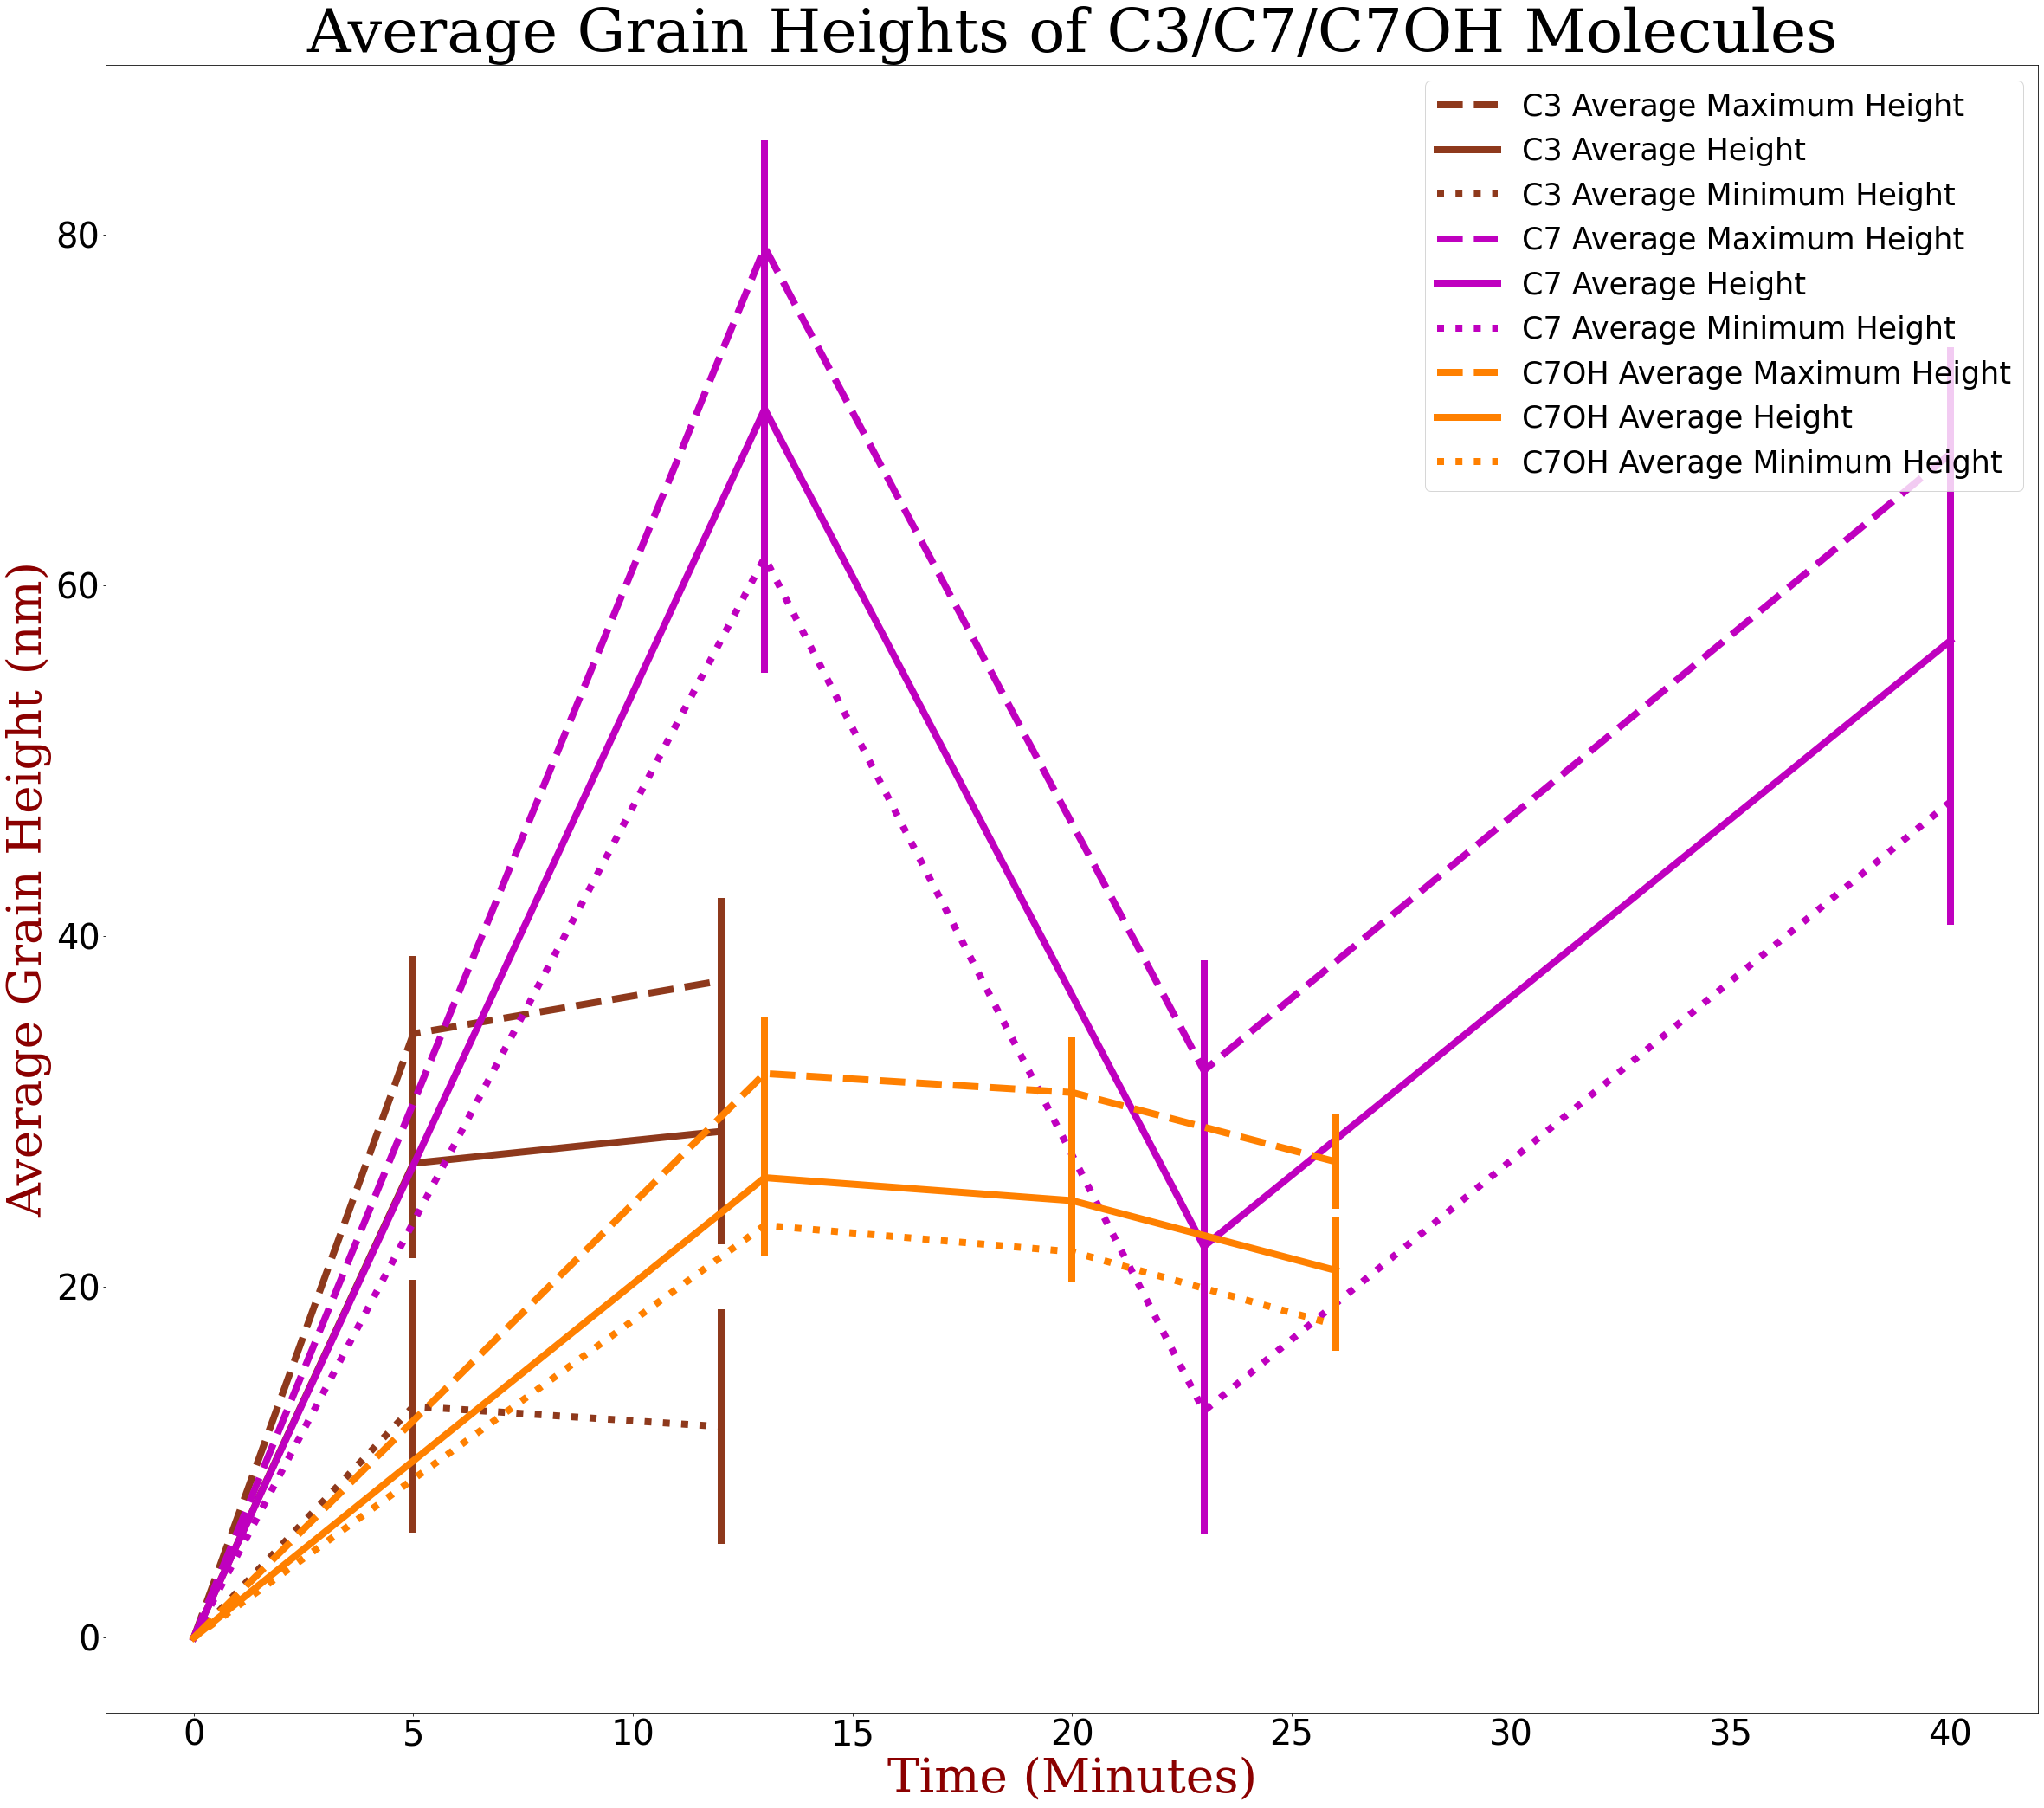

In [30]:
c3_times = np.array([0.000001, 5, 12])
c3_max_height = [c3_0_max_average_height,c3_5_max_average_height,c3_12_max_average_height]
c3_max_height_std = [0,c3_5_max_std_height,c3_12_max_std_height]
c3_average_height = [c3_0_mean_height,c3_5_mean_height,c3_12_mean_height]
c3_average_height_std = [0,c3_5_std_height,c3_12_std_height]
c3_min_height = [c3_0_min_average_height,c3_5_min_average_height,c3_12_min_average_height]
c3_min_height_std = [0,c3_5_min_std_height,c3_12_min_std_height]

c7_times = np.array([0.000001, 13, 23, 40])
c7_max_height = [c7_0_max_average_height,c7_13_max_average_height,c7_23_max_average_height,c7_40_max_average_height]
c7_max_height_std = [0,c7_13_max_std_height,c7_23_max_std_height,c7_40_max_std_height]
c7_average_height = [c7_0_mean_height,c7_13_mean_height,c7_23_mean_height,c7_40_mean_height]
c7_average_height_std = [0,c7_13_std_height,c7_23_std_height,c7_40_std_height]
c7_min_height = [c7_0_min_average_height,c7_13_min_average_height,c7_23_min_average_height,c7_40_min_average_height]
c7_min_height_std = [0,c7_13_min_std_height,c7_23_min_std_height,c7_40_min_std_height]

c7OH_times = np.array([0.000001, 13, 20, 26])
c7OH_max_height = [c7OH_0_max_average_height,c7OH_13_max_average_height,c7OH_20_max_average_height,c7OH_26_max_average_height]
c7OH_max_height_std = [0,c7OH_13_max_std_height,c7OH_20_max_std_height,c7OH_26_max_std_height]
c7OH_average_height = [c7OH_0_mean_height,c7OH_13_mean_height,c7OH_20_mean_height,c7OH_26_mean_height]
c7OH_average_height_std = [0,c7OH_13_std_height,c7OH_20_std_height,c7OH_26_std_height]
c7OH_min_height = [c7OH_0_min_average_height,c7OH_13_min_average_height,c7OH_20_min_average_height,c7OH_26_min_average_height]
c7OH_min_height_std = [0,c7OH_13_min_std_height,c7OH_20_min_std_height,c7OH_26_min_std_height]

plt.figure(figsize=(40,35))

plt.plot(c3_times, c3_max_height, lw=8, ls='dashed', color=(0.555, 0.222, 0.111), label='C3 Average Maximum Height')
plt.errorbar(c3_times, c3_max_height, c3_max_height_std, lw=8, ls='', color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_average_height, lw=8, color=(0.555, 0.222, 0.111), linestyle='-', label='C3 Average Height')
plt.errorbar(c3_times, c3_average_height, c3_average_height_std, ls='',lw=8, color=(0.555, 0.222, 0.111))
plt.plot(c3_times, c3_min_height, lw=8, color=(0.555, 0.222, 0.111), linestyle=':', label='C3 Average Minimum Height')
plt.errorbar(c3_times, c3_min_height, c3_min_height_std, ls='', lw=8, color=(0.555, 0.222, 0.111))

plt.plot(c7_times, c7_max_height, lw=8, ls='dashed', color=(0.75, 0.0, 0.75), label='C7 Average Maximum Height')
plt.errorbar(c7_times, c7_max_height, c7_max_height_std, lw=8, ls='', color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_average_height, lw=8, color=(0.75, 0.0, 0.75), linestyle='-', label='C7 Average Height')
plt.errorbar(c7_times, c7_average_height, c7_average_height_std, ls='',lw=8, color=(0.75, 0.0, 0.75))
plt.plot(c7_times, c7_min_height, lw=8, color=(0.75, 0.0, 0.75), linestyle=':', label='C7 Average Minimum Height')
plt.errorbar(c7_times, c7_min_height, c7_min_height_std, ls='', lw=8, color=(0.75, 0.0, 0.75))

plt.plot(c7OH_times, c7OH_max_height, lw=8, ls='dashed', color=(1.0, 0.5, 0.0), label='C7OH Average Maximum Height')
plt.errorbar(c7OH_times, c7OH_max_height, c7OH_max_height_std, lw=8, ls='', color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_average_height, lw=8, color=(1.0, 0.5, 0.0), linestyle='-', label='C7OH Average Height')
plt.errorbar(c7OH_times, c7OH_average_height, c7OH_average_height_std, ls='',lw=8, color=(1.0, 0.5, 0.0))
plt.plot(c7OH_times, c7OH_min_height, lw=8, color=(1.0, 0.5, 0.0), linestyle=':', label='C7OH Average Minimum Height')
plt.errorbar(c7OH_times, c7OH_min_height, c7OH_min_height_std, ls='', lw=8, color=(1.0, 0.5, 0.0))

plt.title('Average Grain Heights of C3/C7/C7OH Molecules', fontsize=70, fontdict = font1)
plt.xlabel('Time (Minutes)', fontsize=55, fontdict = font2)
plt.ylabel('Average Grain Height (nm)', fontsize=55, fontdict = font2)
plt.xticks(fontsize=40, rotation=0)
plt.yticks(fontsize=40, rotation=0)
plt.legend(loc='upper right' ,fontsize=35)
plt.show()